# Group 16: Artificial Intelligence Techniques Assignment

## Table of Contents

1.  [Data Exploration and Visualization](#1.0-Data-Exploration-and-Visualization)
     1. [Load the Dataset](#1.1-Load-the-Dataset)
     2. [Explore the Dataset](#1.2-Explore-the-Dataset)
2. [Data preprocessing](#2.0-Data-preprocessing)
   1. [Handling Missing Values](#2.1-Handling-Missing-Values)
   2. [Splitting Data into Training and Testing Sets](#2.2-Splitting-Data-into-Training-and-Testing-Sets)
   3. [Split the Input Matrix into Numerical and Categorical Sets](#2.3-Split-the-Input-Matrix-into-Numerical-and-Categorical-Sets)
   4. [Preprocessing Numerical and Categorical Data](#2.4-Preprocessing-Numerical-and-Categorical-Data)
      1. [Standardize Numeric Data](#2.4.1-Standardize-Numeric-Data)
      2. [Split Categorical Data into Nominal and Ordinal data](#2.4.2-Split-Categorical-Data-into-Nominal-and-Ordinal-data)
      3. [Ordinal Encoding for Ordinal Categorical Data](#2.4.3-Ordinal-Encoding-for-Ordinal-Categorical-Data)
      4. [One-Hot Encoding for Nominal Categorical Data](#2.4.4-One-Hot-Encoding-for-Nominal-Categorical-Data)
    5. [Finalizing the Training Set](#2.5-Finalizing-the-Training-Set)
    6. [Model Training and Validation](#2.6-Model-Training-and-Validation)
3. [Model Training](#3.0-Model-Training)
   1. [Model 1: SVM Regression](#Model-1:Support-Vector-Machine(SVM))
   2. [Model 2: RandomForest](#Model-2:-RandomForest)
   3. [Model 3: KNN (K-Nearest Neighbours)](#Model-3:-KNN (K-Nearest Neighbours))
4. [Model Tuning and Testing](#4.0-Model-Tuning-and-Testing)
   1. [Support Vector Machine (SVM)](#Support-Vector-Machine (SVM))
   2. [Random Forest Classifier](#Random-Forest-Classifier)
   3. [KNN (K-Nearest Neighbours) Classifier](#KNN-(K-Nearest-Neighbours-Classifier))
5. [Features Importance of each model](#5.0-Features-Importance-of-each-model)
   1. [RandomForest feature](#RandomForest-feature)
   2. [Support Vector Machine Feature](#SVM-Feature)
   3. [Permutational Feature Importance of KNN](#Permutational-Feature-Importance-of-KNN)


# Import Necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1.0 Data Exploration and Visualization

## 1.1 Load the Dataset


In [2]:
df=  pd.read_csv('dataset.csv')

## 1.2 Explore the Dataset

In [3]:
#Display the first few rows of the dataset
df.head()

,Gender,Age,Height(cm),Weight(kg),Family_history,Alcohol,Junk_food,Vege_day,Meals_day,Snack,Smoking,Water_intake(L),Transportation,Exercise,TV,Income,Discipline,Cardiovascular_risk(y)
0,Female,42,172.2,82.9,no,low,yes,3,3,Sometimes,no,2.72,car,3,rare,2081,no,medium
1,Female,19,175.3,80.0,yes,none,yes,2,1,Sometimes,no,2.65,bus,3,moderate,5551,no,medium
2,Female,43,158.3,81.9,yes,none,yes,3,1,Sometimes,no,1.89,car,1,rare,14046,no,high
3,Female,23,165.0,70.0,yes,low,no,2,1,Sometimes,no,2.00,bus,0,rare,9451,no,medium
4,Male,23,169.0,75.0,yes,low,yes,3,3,Sometimes,no,2.82,bus,1,often,17857,no,medium


In [4]:
# Get basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Gender                  2100 non-null   object 
 1   Age                     2100 non-null   int64  
 2   Height(cm)              2100 non-null   float64
 3   Weight(kg)              2100 non-null   float64
 4   Family_history          2100 non-null   object 
 5   Alcohol                 2100 non-null   object 
 6   Junk_food               2100 non-null   object 
 7   Vege_day                2100 non-null   int64  
 8   Meals_day               2100 non-null   int64  
 9   Snack                   2100 non-null   object 
 10  Smoking                 2100 non-null   object 
 11  Water_intake(L)         2100 non-null   float64
 12  Transportation          2100 non-null   object 
 13  Exercise                2100 non-null   int64  
 14  TV                      2100 non-null   

In [5]:
# Summary statistics for numerical columns
df.describe()

,Age,Height(cm),Weight(kg),Vege_day,Meals_day,Water_intake(L),Exercise,Income
count,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000
mean,24.302381,170.148286,86.561571,2.423333,2.687143,2.007429,1.006190,9432.386190
std,6.342270,9.340941,26.192242,0.584318,0.810088,0.613122,0.894885,5002.350673
min,14.000000,145.000000,39.000000,1.000000,1.000000,1.000000,0.000000,1000.000000
25%,20.000000,163.000000,65.400000,2.000000,3.000000,1.577500,0.000000,4994.500000
50%,23.000000,170.000000,83.000000,2.000000,3.000000,2.000000,1.000000,9226.500000
75%,26.000000,176.800000,107.250000,3.000000,3.000000,2.480000,2.000000,13841.750000
max,61.000000,198.000000,173.000000,3.000000,4.000000,3.000000,3.000000,18000.000000


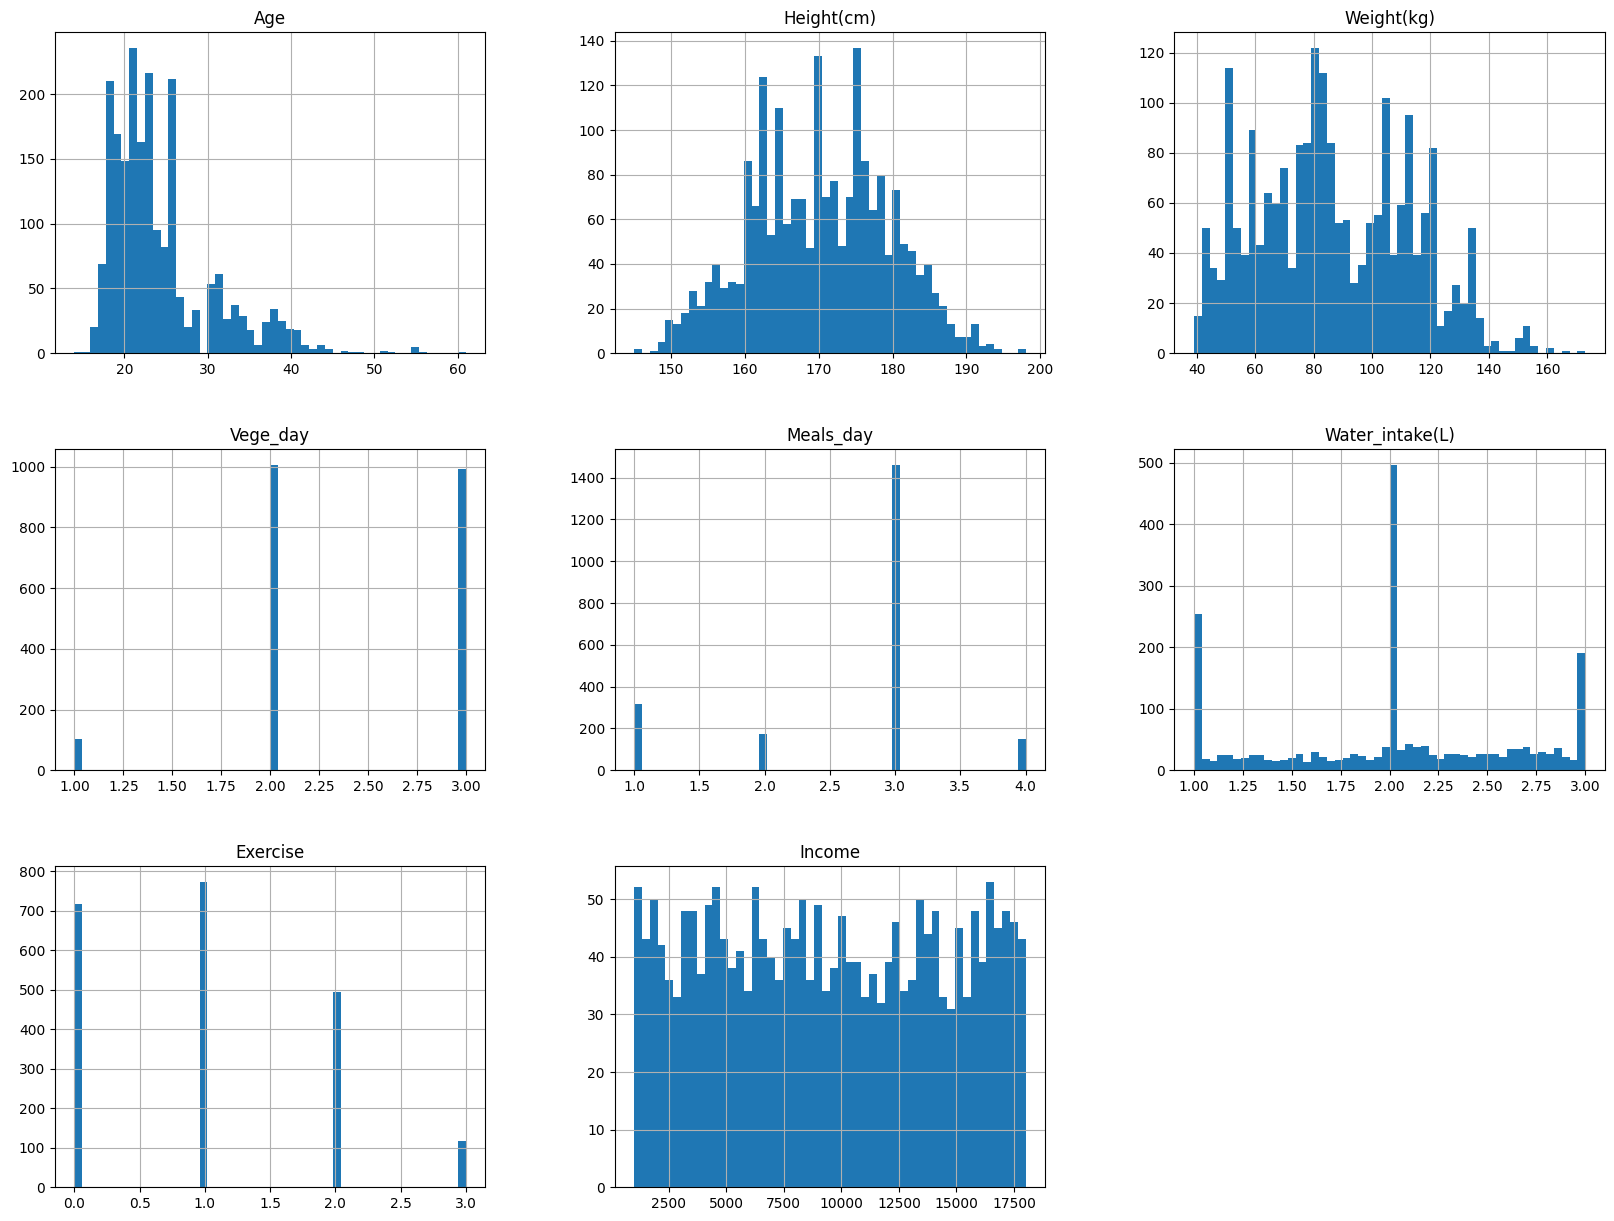

In [6]:
# Plot histograms for each feature
df.hist(bins=50, figsize=(20, 15))
plt.show()

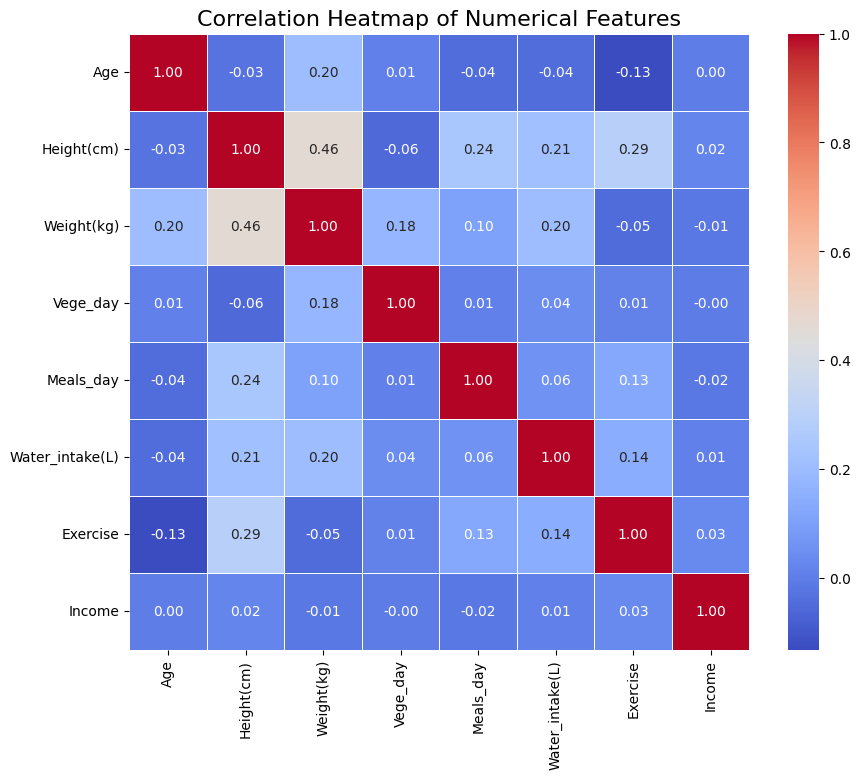

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
# Calculate the correlation matrix for numerical features
corr_matrix = df[numerical_features].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add a title
plt.title('Correlation Heatmap of Numerical Features', fontsize=16)

# Display the heatmap
plt.show()


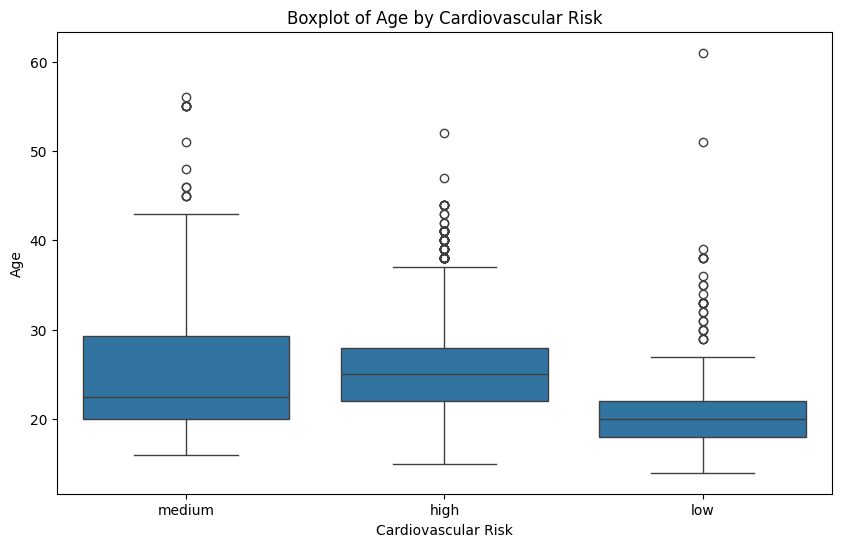

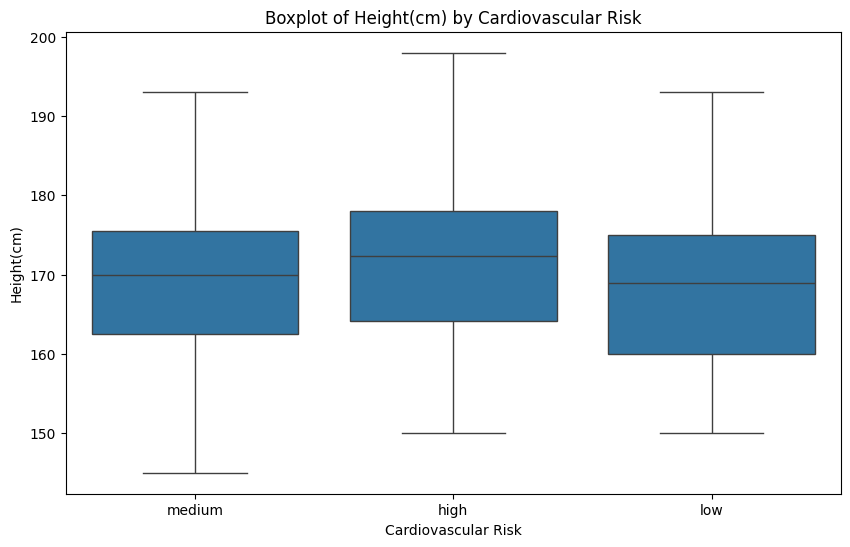

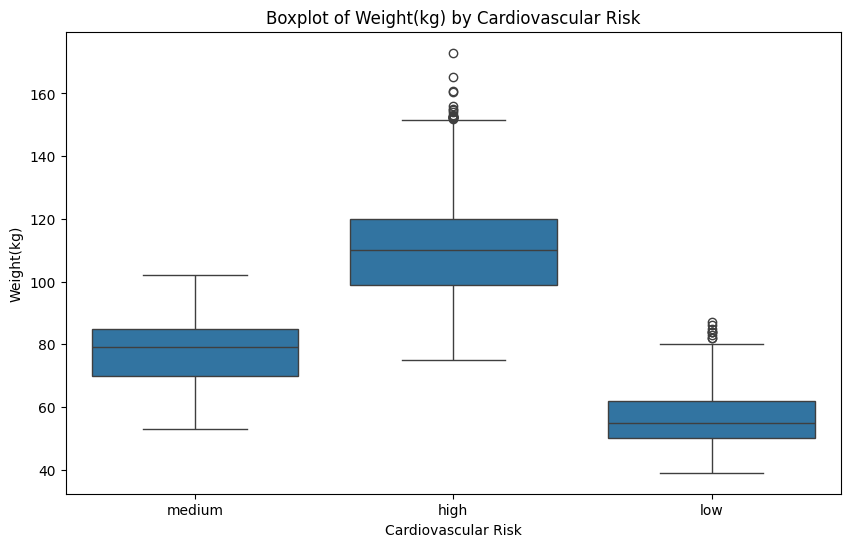

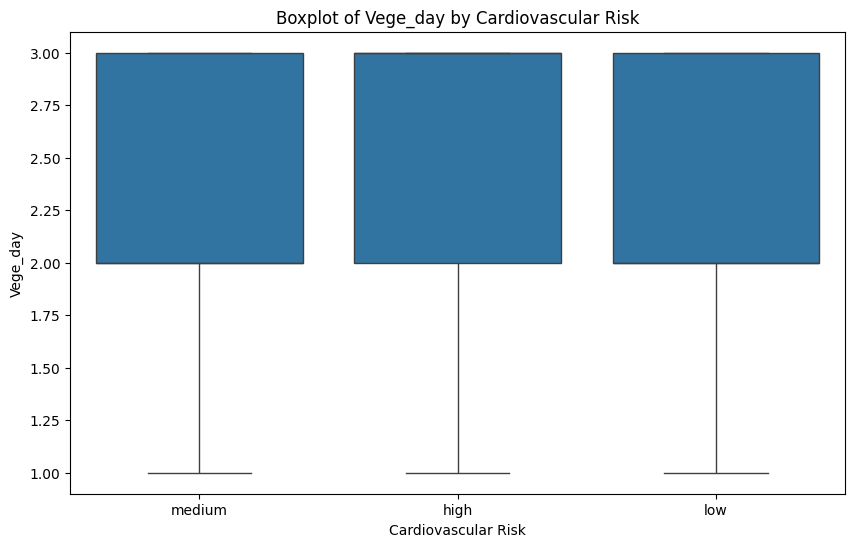

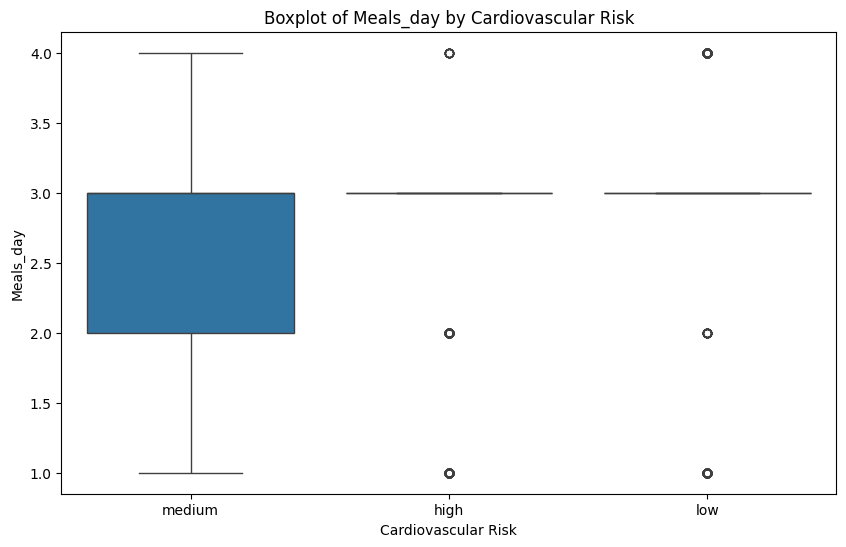

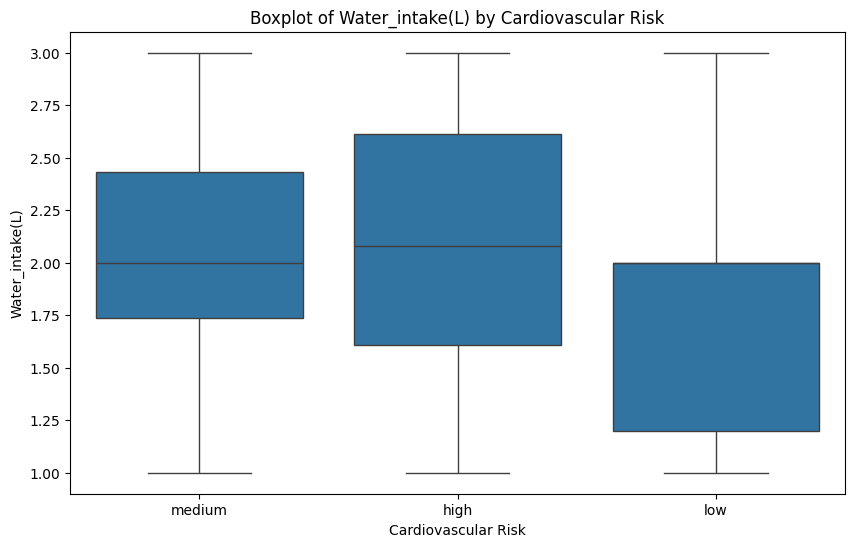

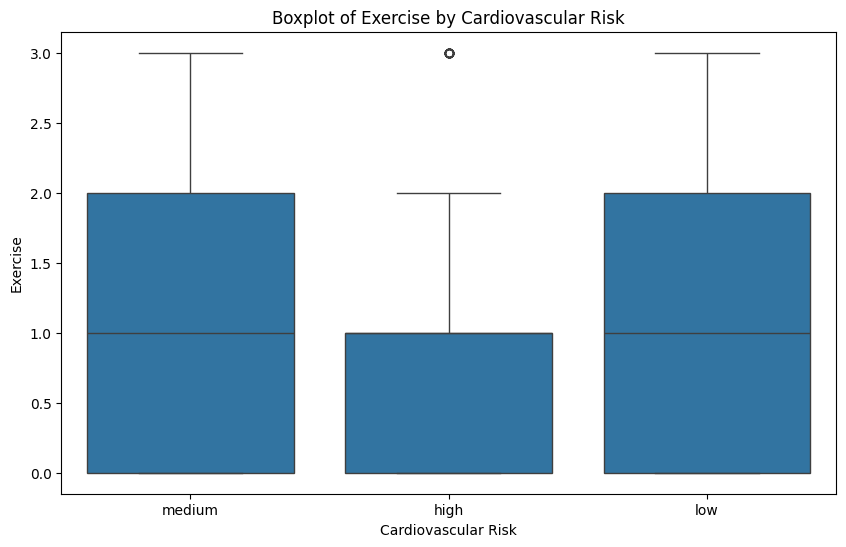

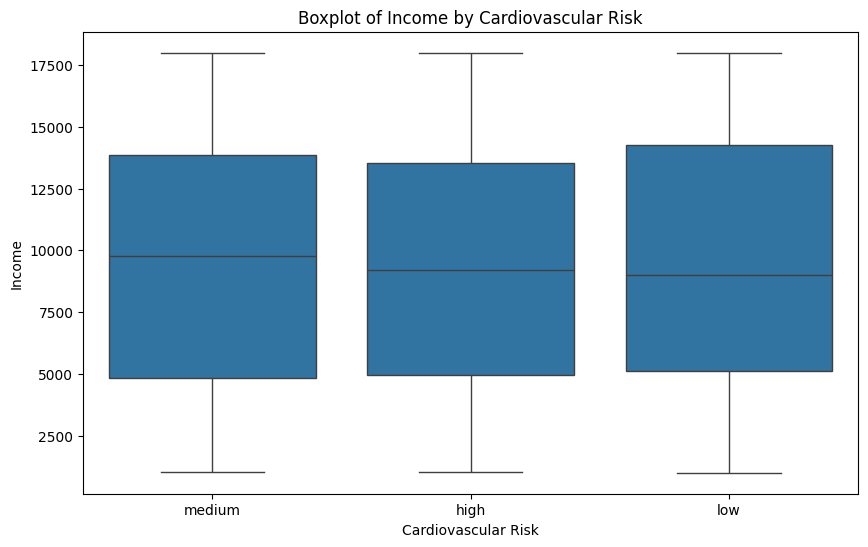

In [8]:
# Creating individual boxplots for each numerical variable
for column in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Cardiovascular_risk(y)', y=column, data=df)
    plt.title(f'Boxplot of {column} by Cardiovascular Risk')
    plt.xlabel('Cardiovascular Risk')
    plt.ylabel(column)
    plt.show()


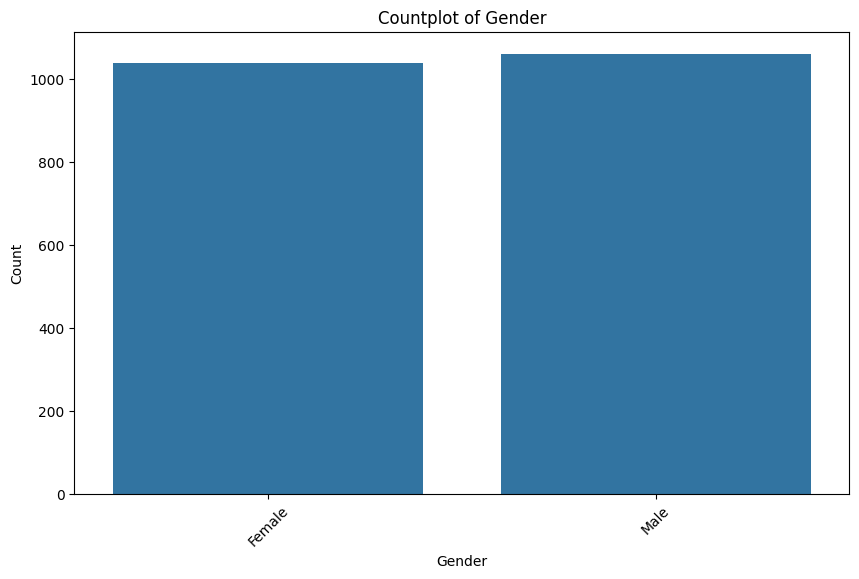

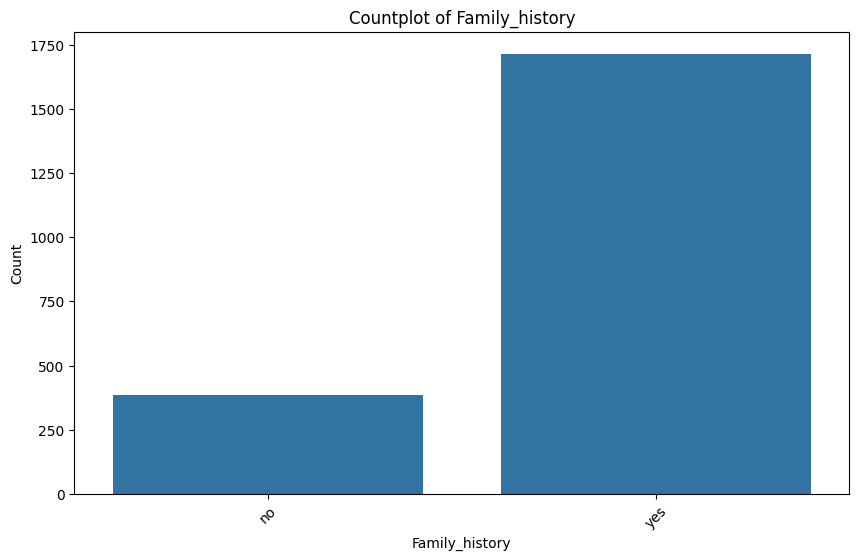

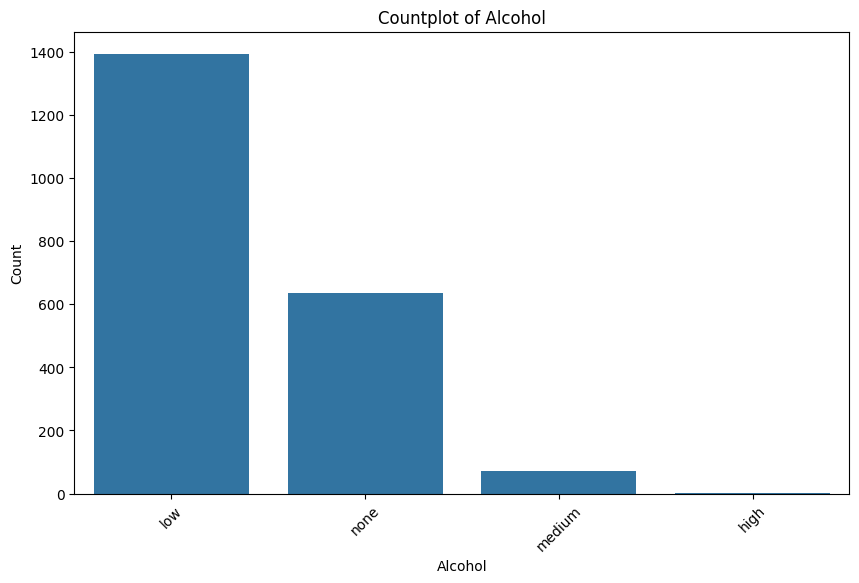

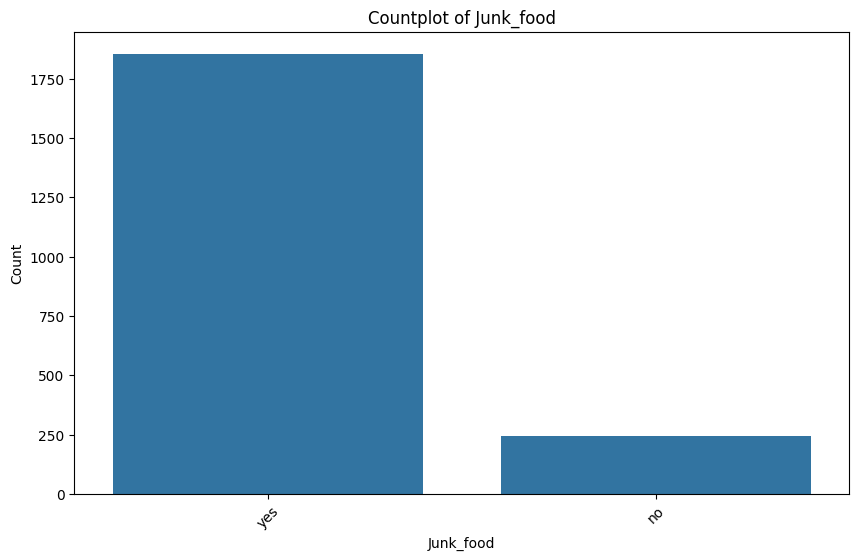

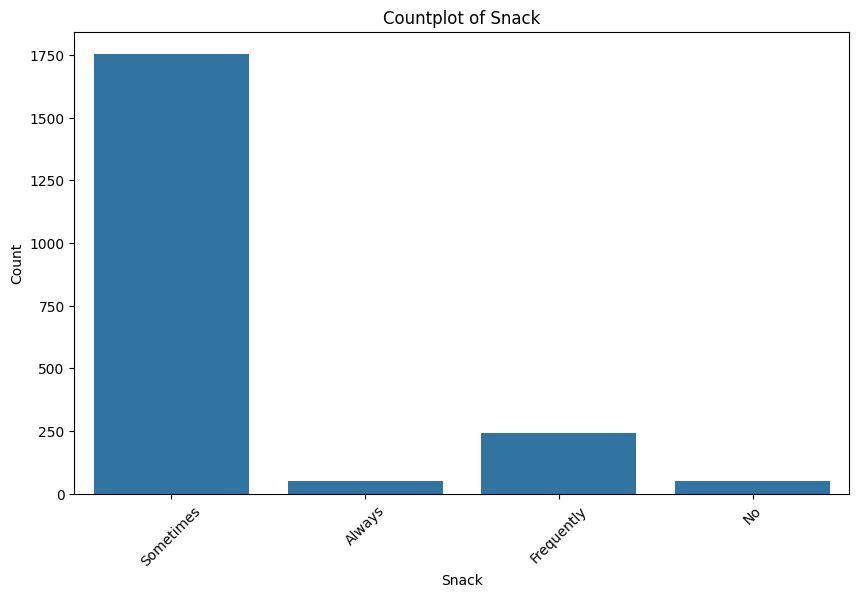

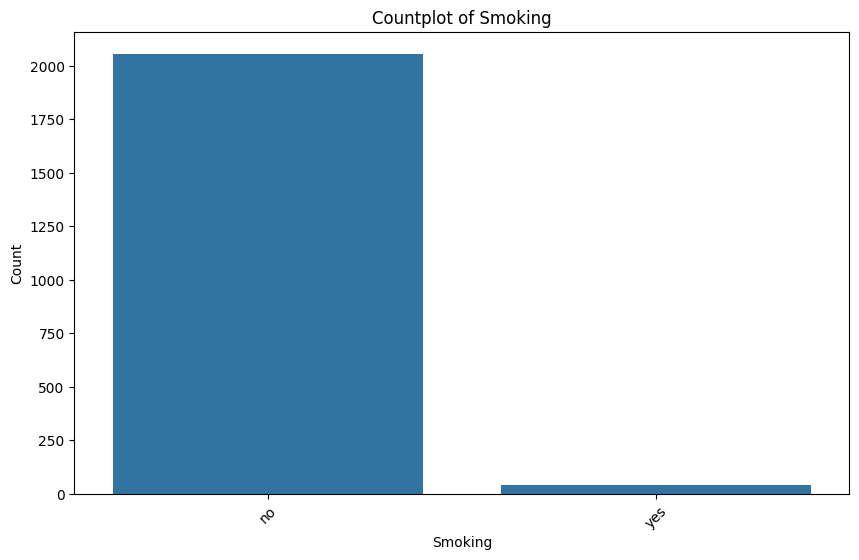

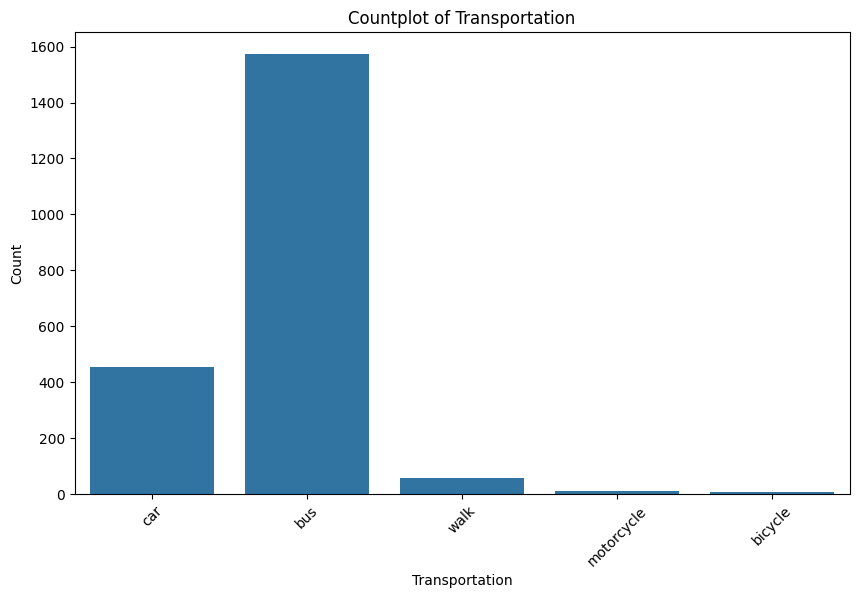

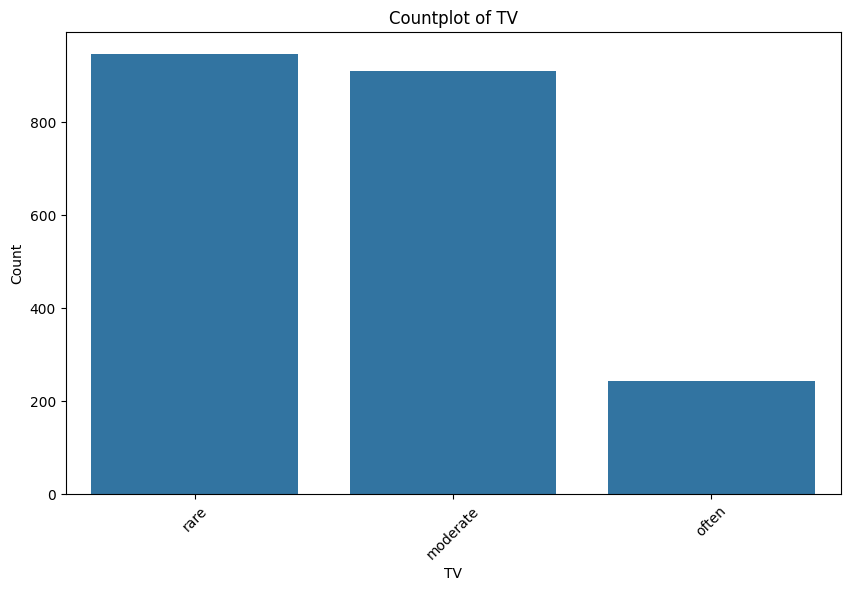

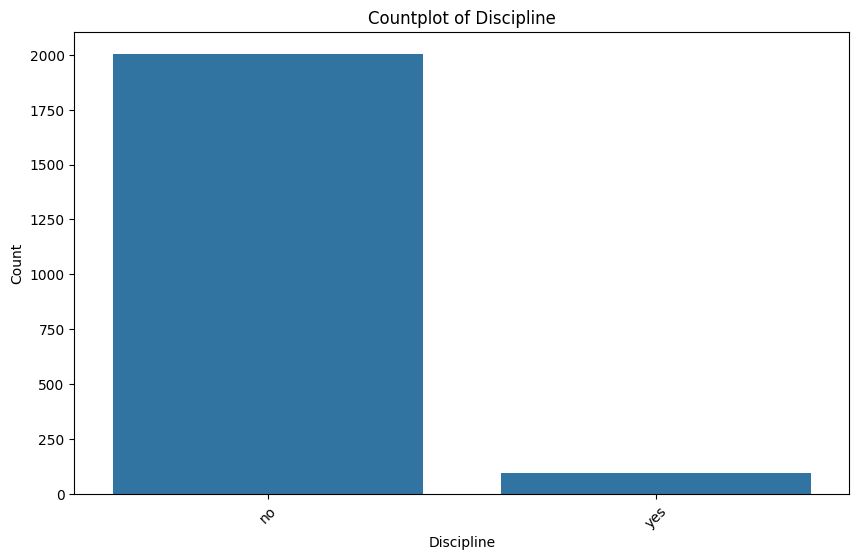

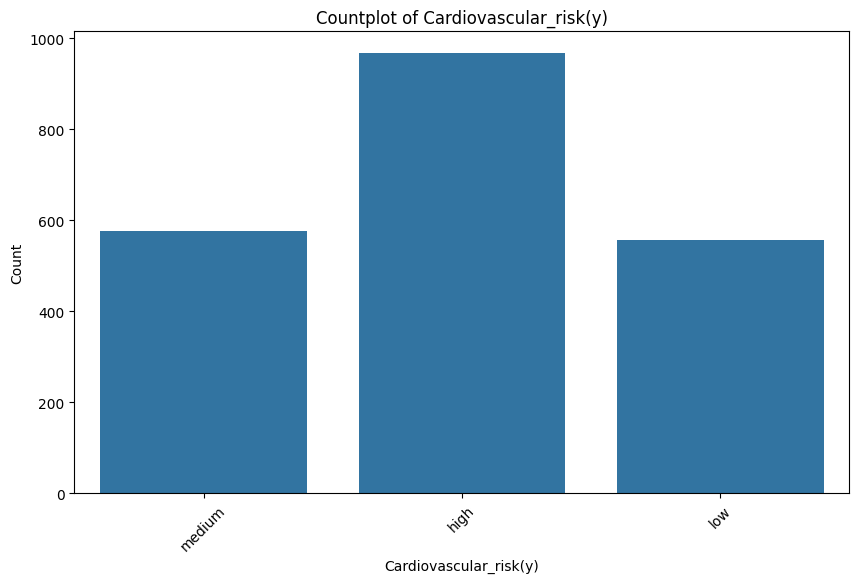

In [9]:
# List of categorical columns
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

# Creating countplots for each categorical variable
for column in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=df[column])
    plt.title(f'Countplot of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

# 2.0 Data preprocessing

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

## 2.1 Handling Missing Values 

In [11]:
# Check for missing values
print("Number of missing values for all columns:")
df.isnull().sum()

Number of missing values for all columns:


Gender                    0
Age                       0
Height(cm)                0
Weight(kg)                0
Family_history            0
Alcohol                   0
Junk_food                 0
Vege_day                  0
Meals_day                 0
Snack                     0
Smoking                   0
Water_intake(L)           0
Transportation            0
Exercise                  0
TV                        0
Income                    0
Discipline                0
Cardiovascular_risk(y)    0
dtype: int64

## 2.2 Splitting Data into Training and Testing Sets

In [12]:
# Separate output vector from the input matrix
X = df.drop('Cardiovascular_risk(y)', axis=1)
y = df['Cardiovascular_risk(y)']

In [13]:
# Show the shapes and types of X and y
print ('Shape of original dataset, train:', df.shape)
print ('X: shape=', X.shape, 'type=', type(X))
print ('y: shape=', y.shape, 'type=', type(y))

Shape of original dataset, train: (2100, 18)
X: shape= (2100, 17) type= <class 'pandas.core.frame.DataFrame'>
y: shape= (2100,) type= <class 'pandas.core.series.Series'>


In [14]:
# Split the dataset into the training set 'train ' and testing set 'test ' using train_test_split
from sklearn.model_selection import train_test_split

# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

# Display the shapes of the resulting datasets
print ('full set shape=', X.shape)
print ('train shape=', X_train.shape)
print ('test shape=', X_test.shape)

full set shape= (2100, 17)
train shape= (1680, 17)
test shape= (420, 17)


## 2.3 Split the Input Matrix into Numerical and Categorical Sets

In [15]:
# Training Set
X_train_num = X_train.drop(['Gender','Family_history','Alcohol', 'Junk_food', 'Snack', 'Smoking', 'Transportation', 'TV', 'Discipline'],axis=1)

# Testing Set
X_test_num = X_test.drop(['Gender','Family_history','Alcohol', 'Junk_food', 'Snack', 'Smoking', 'Transportation', 'TV', 'Discipline'],axis=1)

In [16]:
print('X_train_num shape:', X_train_num.shape)
X_train_num.head()

X_train_num shape: (1680, 8)


,Age,Height(cm),Weight(kg),Vege_day,Meals_day,Water_intake(L),Exercise,Income
1062,31,169.3,71.9,3,3,1.77,1,1434
1467,26,166.0,112.0,3,3,2.96,0,17015
2077,27,179.1,83.3,1,4,2.50,0,17427
1066,26,162.9,108.1,3,3,1.76,0,5531
692,18,170.7,50.7,2,3,1.55,1,5496


## 2.4 Preprocessing Numerical and Categorical Data

### 2.4.1 Standardize Numeric Data

In [17]:
# Training Set
scaler = StandardScaler(copy = False)      
X_train_num_tr = scaler.fit_transform(X_train_num)

# Testing Set
X_test_num_tr = scaler.transform(X_test_num)

### 2.4.2 Split Categorical Data into Nominal and Ordinal data

In [18]:
# Training Set
X_train_cat_nominal = X_train[['Gender', 'Family_history', 'Junk_food', 'Smoking', 'Transportation', 'Discipline']]
X_train_cat_ordinal = X_train[['Alcohol', 'Snack', 'TV']]

# Testing Set
X_test_cat_nominal = X_test[['Gender', 'Family_history', 'Junk_food', 'Smoking', 'Transportation', 'Discipline']]
X_test_cat_ordinal = X_test[['Alcohol', 'Snack', 'TV']]

### 2.4.3 Ordinal Encoding for Ordinal Categorical Data

In [19]:
# Define the order for ordinal variables with a custom ordering
ordinal_categories = [
    ['none', 'low', 'medium', 'high'],  # Custom order for Alcohol
    ['No', 'Sometimes', 'Frequently', 'Always'],  # Custom order for Snacks
    ['rare', 'moderate', 'often']  # Custom order for TV Watching Frequency
]

# Initialize the OrdinalEncoder with the defined categories
ordinal_encoder = OrdinalEncoder(categories=ordinal_categories)

# Fit and transform the training data for the categorical ordinal features
X_train_cat_ordinal_encoded = ordinal_encoder.fit_transform(X_train_cat_ordinal)

# Check the mapping for ordinal variables
print("Ordinal Categories Mapping by OrdinalEncoder:")

# Iterate over the features and categories using zip
for feature, categories in zip(X_train_cat_ordinal.columns, ordinal_encoder.categories_):
    print(f"Feature '{feature}' encoded as:")
    # Use a list comprehension for generating the category-encoding pairs
    encoding_map = [f"  {category}: {index}" for index, category in enumerate(categories)]
    # Join the list into a single string and print
    print("\n".join(encoding_map))

# Transform the testing set using the fitted encoder
X_test_cat_ordinal_encoded = ordinal_encoder.transform(X_test_cat_ordinal)


Ordinal Categories Mapping by OrdinalEncoder:
Feature 'Alcohol' encoded as:
  none: 0
  low: 1
  medium: 2
  high: 3
Feature 'Snack' encoded as:
  No: 0
  Sometimes: 1
  Frequently: 2
  Always: 3
Feature 'TV' encoded as:
  rare: 0
  moderate: 1
  often: 2


### 2.4.4 One-Hot Encoding for Nominal Categorical Data

In [20]:
# Training Set
onehot_encoder = OneHotEncoder(sparse_output=False)  
X_train_cat_nominal_encoded = onehot_encoder.fit_transform(X_train_cat_nominal)

# Testing Set
X_test_cat_nominal_encoded = onehot_encoder.transform(X_test_cat_nominal)

## 2.5 Finalizing the Training Set

In [21]:
# Training Set
X_train_cat_encoded = np.hstack([X_train_cat_nominal_encoded, X_train_cat_ordinal_encoded])
X_train_tr = np.hstack([X_train_num_tr, X_train_cat_encoded])
y_train = y_train.values

# Testing Set
X_test_cat_encoded = np.hstack([X_test_cat_nominal_encoded, X_test_cat_ordinal_encoded])
X_test_tr = np.hstack([X_test_num_tr, X_test_cat_encoded])
y_test = y_test.values

print('X_train_tr shape:', X_train_tr.shape)
print('y_train shape:', y_train.shape)
print('X_test_tr shape:', X_test_tr.shape)
print('y_test shape:', y_test.shape)

X_train_tr shape: (1680, 26)
y_train shape: (1680,)
X_test_tr shape: (420, 26)
y_test shape: (420,)


## 2.6 Model Training and Validation

In [22]:
# Function to visualize ROC and Precision-Recall curves for multi-class classification
def plot_multiclass_curves(y_actual, y_predicted_scores, labels, model_name):
    """
    Visualize ROC and Precision-Recall curves for multi-class classification.

    Parameters:
    y_actual (array-like): Ground truth labels
    y_predicted_scores (array-like): Predicted scores from the classifier
    labels (list): List of class labels
    model_name (str): Name of the model for annotation purposes

    Returns:
    dict: A dictionary containing AUC scores for both ROC and Precision-Recall curves per class
    """
    # Binarize the ground truth labels for multi-class classification
    y_actual_bin = label_binarize(y_actual, classes=labels)
    num_classes = y_actual_bin.shape[1]

    # Initialize dictionaries to hold AUC scores
    roc_auc_dict = {}
    pr_auc_dict = {}

    # Plot ROC curves
    plt.figure(figsize=(10, 6))
    for i in range(num_classes):
        fpr, tpr, _ = roc_curve(y_actual_bin[:, i], y_predicted_scores[:, i])
        roc_auc = auc(fpr, tpr)
        roc_auc_dict[labels[i]] = roc_auc
        plt.plot(fpr, tpr, lw=3, label=f'{labels[i]} (AUC = {roc_auc:.4f})')
    
    # Add a diagonal line representing random chance
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=14)
    plt.ylabel('True Positive Rate', fontsize=14)
    plt.title(f'ROC Curves for {model_name}', fontsize=16)
    plt.legend(loc="lower right")
    plt.show()

    # Plot Precision-Recall curves
    plt.figure(figsize=(10, 6))
    for i in range(num_classes):
        precision, recall, _ = precision_recall_curve(y_actual_bin[:, i], y_predicted_scores[:, i])
        pr_auc = auc(recall, precision)
        pr_auc_dict[labels[i]] = pr_auc
        plt.plot(recall, precision, lw=3, label=f'{labels[i]} (PR AUC = {pr_auc:.4f})')

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall', fontsize=14)
    plt.ylabel('Precision', fontsize=14)
    plt.title(f'Precision-Recall Curves for {model_name}', fontsize=16)
    plt.legend(loc="lower left")
    plt.show()

    # Print AUC scores for both ROC and Precision-Recall
    print("AUC Scores for ROC Curves:")
    for label, score in roc_auc_dict.items():
        print(f'{label}: AUC (ROC) = {score:.4f}')
    
    print("\nAUC Scores for Precision-Recall Curves:")
    for label, score in pr_auc_dict.items():
        print(f'{label}: AUC (PR) = {score:.4f}')
    
    return {"roc_auc_scores": roc_auc_dict, "pr_auc_scores": pr_auc_dict}

# Step 7: Extract class labels from the training data
labels = np.unique(y_train)  # Unique class labels


# 3.0 Model Training
# Model 1: Support Vector Machine (SVM)

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.preprocessing import label_binarize, OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import (
    roc_curve, auc, precision_recall_curve, average_precision_score, 
    roc_auc_score, accuracy_score, classification_report, 
    confusion_matrix, precision_score, recall_score, f1_score
)
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_predict, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

# Plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
# Step 1: Initialize the SVC classifier
svc_model = SVC(kernel='linear', probability=True, random_state=69)

# Wrap the SVC model with OneVsRestClassifier for multi-class classification
multi_class_model = OneVsRestClassifier(svc_model)

# Train the OneVsRest model on the training data
multi_class_model.fit(X_train_tr, y_train)

# Step 3: Make predictions on the training data
train_predictions = multi_class_model.predict(X_train_tr)

# Calculate and print accuracy on the training set
training_accuracy = accuracy_score(y_train, train_predictions)
print(f"Training Set Accuracy: {training_accuracy:.4f}")

# Compute and display precision, recall, and F1 score (macro average) for the training set
precision_train = precision_score(y_train, train_predictions, average='macro')
recall_train = recall_score(y_train, train_predictions, average='macro')
f1_train = f1_score(y_train, train_predictions, average='macro')

print(f'Precision (Macro Average): {precision_train:.4f}')
print(f'Recall (Macro Average): {recall_train:.4f}')
print(f'F1 Score (Macro Average): {f1_train:.4f}')

# Perform cross-validation and output the scores
cross_val_scores = cross_val_score(multi_class_model, X_train_tr, y_train, cv=3)
print(f"Cross-Validation Scores: {cross_val_scores}")
print(f"Average Cross-Validation Score: {cross_val_scores.mean():.4f}")

# Generate and print the confusion matrix for the training set
training_conf_matrix = confusion_matrix(y_train, train_predictions)
print("Training Set Confusion Matrix:\n", training_conf_matrix)


Training Set Accuracy: 0.9530
Precision (Macro Average): 0.9505
Recall (Macro Average): 0.9433
F1 Score (Macro Average): 0.9454
Cross-Validation Scores: [0.93214286 0.92857143 0.92142857]
Average Cross-Validation Score: 0.9274
Training Set Confusion Matrix:
 [[779   0   2]
 [  0 424  11]
 [ 28  38 398]]


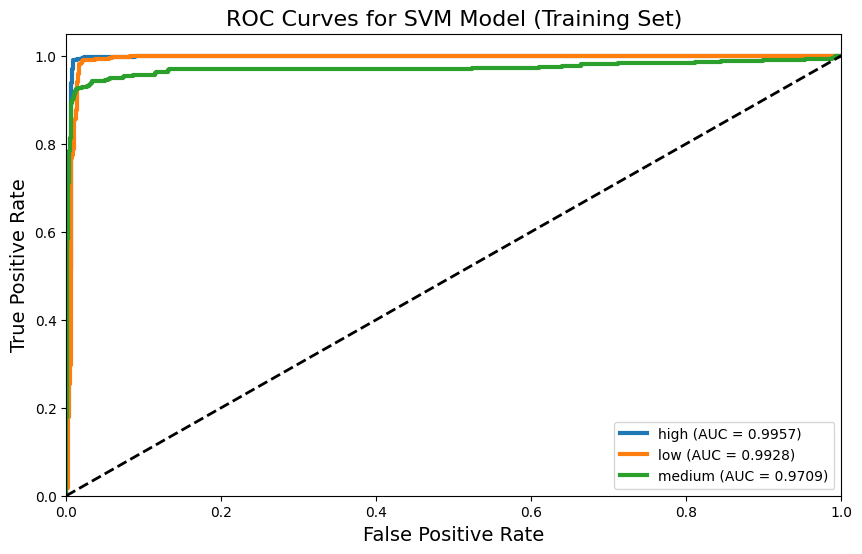

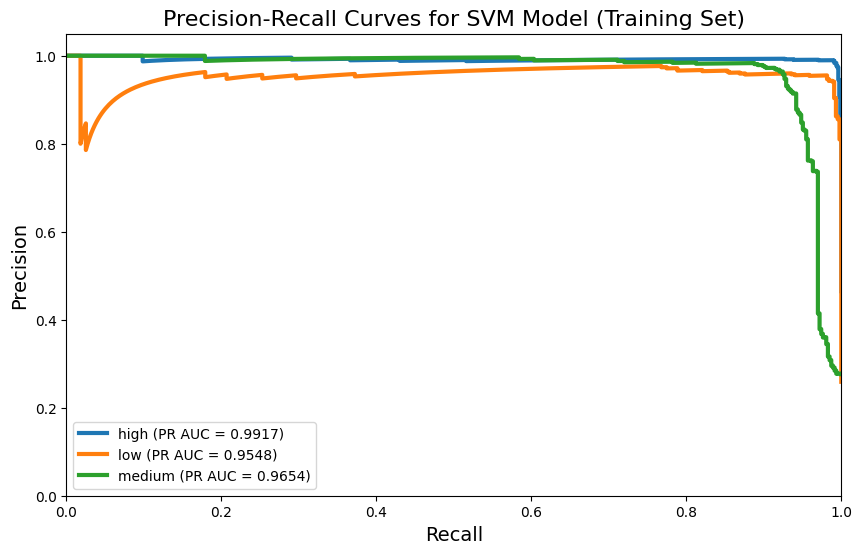

AUC Scores for ROC Curves:
high: AUC (ROC) = 0.9957
low: AUC (ROC) = 0.9928
medium: AUC (ROC) = 0.9709

AUC Scores for Precision-Recall Curves:
high: AUC (PR) = 0.9917
low: AUC (PR) = 0.9548
medium: AUC (PR) = 0.9654
Macro Average ROC AUC for SVC = 0.9865
Macro Average PR AUC for SVC = 0.9706


In [25]:
# Perform cross-validation with prediction probabilities for SVC using OneVsRestClassifier
predicted_probs_cv_svc = cross_val_predict(
    multi_class_model, 
    X_train_tr, 
    y_train, 
    cv=3, 
    method="predict_proba"
)

# Assuming plot_multiclass_curves is defined elsewhere in your code
# This function should return a dictionary with 'roc_auc_scores' and 'pr_auc_scores'
svc_scores = plot_multiclass_curves(y_train, predicted_probs_cv_svc, labels, 'SVM Model (Training Set)')

# Ensure that 'svc_scores' dictionary is correctly populated
roc_auc_scores_svc = svc_scores.get('roc_auc_scores')
pr_auc_scores_svc = svc_scores.get('pr_auc_scores')

# Calculate the macro average for ROC AUC
if roc_auc_scores_svc is not None:
    macro_avg_roc_auc_svc = np.mean(list(roc_auc_scores_svc.values()))
    print(f'Macro Average ROC AUC for SVC = {macro_avg_roc_auc_svc:.4f}')
else:
    print("Error: ROC AUC scores not found for SVC.")

# Calculate the macro average for PR AUC
if pr_auc_scores_svc is not None:
    macro_avg_pr_auc_svc = np.mean(list(pr_auc_scores_svc.values()))
    print(f'Macro Average PR AUC for SVC = {macro_avg_pr_auc_svc:.4f}')
else:
    print("Error: PR AUC scores not found for SVC.")


## Test Set Evaluation

In [26]:
# Generate predictions on the test set using the trained OneVsRest SVC model
test_predictions_svc = multi_class_model.predict(X_test_tr)

# Calculate and display accuracy on the test set
test_accuracy_svc = accuracy_score(y_test, test_predictions_svc)
print(f"Test Set Accuracy: {test_accuracy_svc:.4f}")

# Compute and display precision, recall, and F1 score (macro average) for the test set
precision_macro_test_svc = precision_score(y_test, test_predictions_svc, average='macro')
recall_macro_test_svc = recall_score(y_test, test_predictions_svc, average='macro')
f1_macro_test_svc = f1_score(y_test, test_predictions_svc, average='macro')

print(f'Precision (Macro Average on Test Set): {precision_macro_test_svc:.4f}')
print(f'Recall (Macro Average on Test Set): {recall_macro_test_svc:.4f}')
print(f'F1 Score (Macro Average on Test Set): {f1_macro_test_svc:.4f}')

# Generate and display the confusion matrix for the test set
print("\nConfusion Matrix (Test Set):")
print(confusion_matrix(y_test, test_predictions_svc))



Test Set Accuracy: 0.9548
Precision (Macro Average on Test Set): 0.9513
Recall (Macro Average on Test Set): 0.9447
F1 Score (Macro Average on Test Set): 0.9473

Confusion Matrix (Test Set):
[[186   0   0]
 [  0 117   5]
 [  5   9  98]]


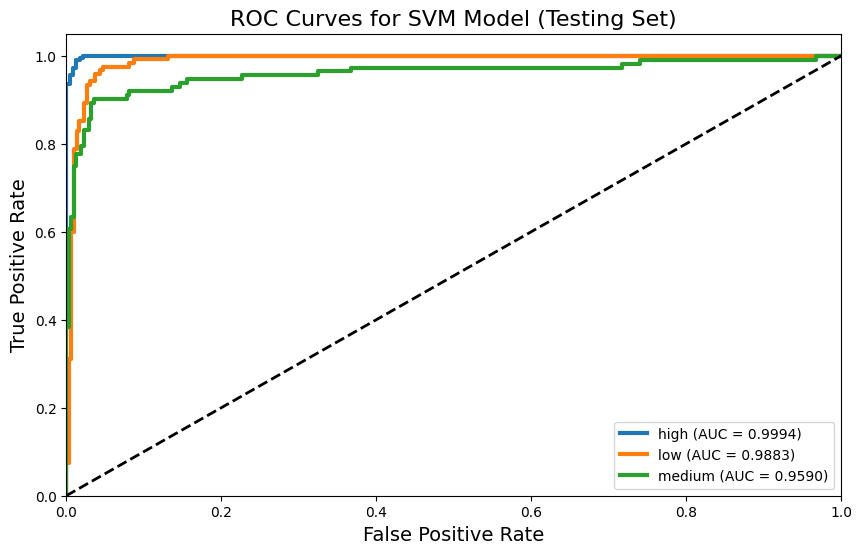

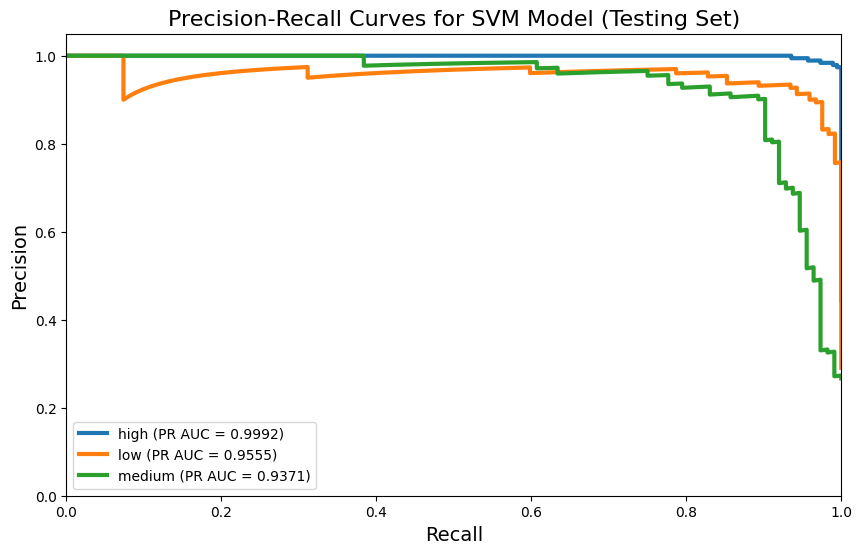

AUC Scores for ROC Curves:
high: AUC (ROC) = 0.9994
low: AUC (ROC) = 0.9883
medium: AUC (ROC) = 0.9590

AUC Scores for Precision-Recall Curves:
high: AUC (PR) = 0.9992
low: AUC (PR) = 0.9555
medium: AUC (PR) = 0.9371
Macro Average ROC AUC = 0.9822
Macro Average PR AUC = 0.9639


In [27]:
# Perform cross-validation with prediction probabilities
predicted_probs_cv = cross_val_predict(multi_class_model, X_test_tr, y_test, cv=3, method="predict_proba")

# Assuming plot_multiclass_curves is defined elsewhere in your code
# This function should return a dictionary with 'auc_scores' and 'pr_auc_scores'
scores = plot_multiclass_curves(y_test, predicted_probs_cv, labels, 'SVM Model (Testing Set)')

# Ensure that 'scores' dictionary is correctly populated
roc_auc_scores = scores.get('roc_auc_scores')
pr_auc_scores = scores.get('pr_auc_scores')

# Calculate the macro average for ROC AUC
if roc_auc_scores is not None:
    macro_avg_roc_auc = np.mean(list(roc_auc_scores.values()))
    print(f'Macro Average ROC AUC = {macro_avg_roc_auc:.4f}')
else:
    print("Error: ROC AUC scores not found.")

# Calculate the macro average for PR AUC
if pr_auc_scores is not None:
    macro_avg_pr_auc = np.mean(list(pr_auc_scores.values()))
    print(f'Macro Average PR AUC = {macro_avg_pr_auc:.4f}')
else:
    print("Error: PR AUC scores not found.")

# Model 2: RandomForest

In [28]:
# Initialize the Random Forest Classifier
rfc = RandomForestClassifier(n_estimators =42,max_depth=10, random_state=69)

# Train the model on the training data
rfc.fit(X_train_tr,y_train)

# Predict on the training set
y_pred_train = rfc.predict(X_train_tr)

#Calculate accuracy of the model
rfc_acc= accuracy_score(y_train, y_pred_train)
print(f"Accuracy on training set: {rfc_acc: .4f}")


precision_rfc = precision_score(y_train, y_pred_train, average='macro')
recall_rfc = recall_score(y_train, y_pred_train, average='macro')
f1_rfc = f1_score(y_train, y_pred_train, average='macro')
print(f"Precision (macro): {precision_rfc:.4f}")
print(f"Recall (macro): {recall_rfc:.4f}")
print(f"F1 Score (macro): {f1_rfc:.4f}")

# Cross-Validation
# Perform cross-validation
cv_scores = cross_val_score(rfc, X_train_tr, y_train, cv=3, scoring = 'accuracy')
print(f"Cross-validation scores: {cv_scores}")
print(f"Average CV Scores: {cv_scores.mean():.4f}")

# Compute and display the confusion matrix
conf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix:")
print(conf_matrix)



Accuracy on training set:  0.9988
Precision (macro): 0.9986
Recall (macro): 0.9985
F1 Score (macro): 0.9985
Cross-validation scores: [0.93928571 0.95178571 0.95      ]
Average CV Scores: 0.9470
Confusion Matrix:
[[781   0   0]
 [  0 433   2]
 [  0   0 464]]


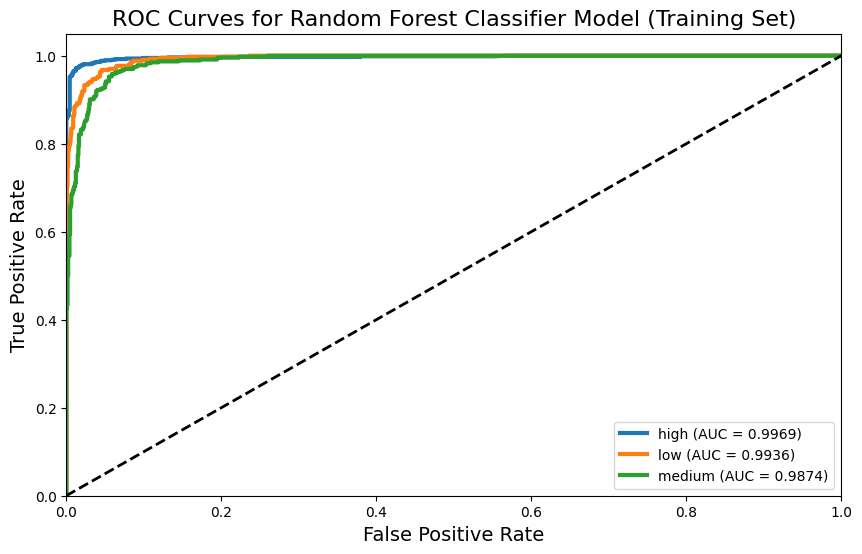

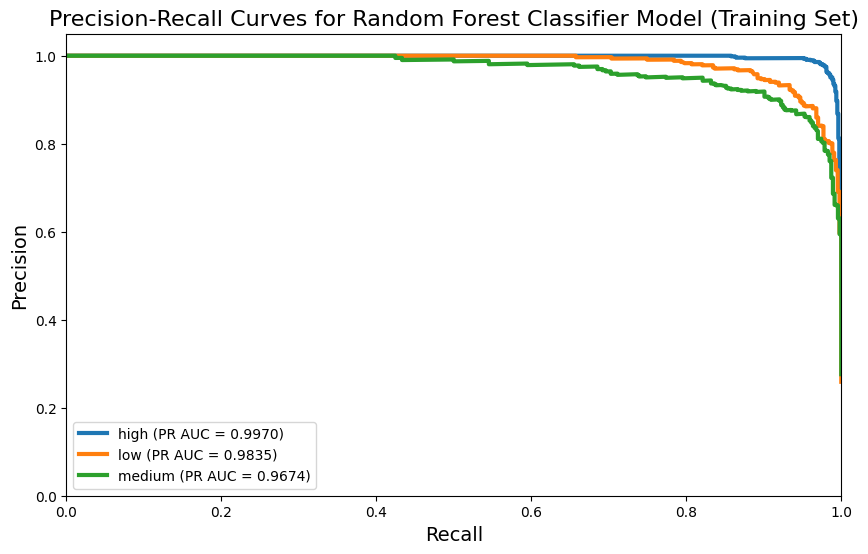

AUC Scores for ROC Curves:
high: AUC (ROC) = 0.9969
low: AUC (ROC) = 0.9936
medium: AUC (ROC) = 0.9874

AUC Scores for Precision-Recall Curves:
high: AUC (PR) = 0.9970
low: AUC (PR) = 0.9835
medium: AUC (PR) = 0.9674
Macro Average ROC AUC = 0.9926
Macro Average PR AUC = 0.9827


In [29]:
# Perform cross-validation with prediction probabilities
predicted_probs_cv = cross_val_predict(rfc, X_train_tr, y_train, cv=3, method="predict_proba")

# Assuming plot_multiclass_curves is defined elsewhere in your code
# This function should return a dictionary with 'roc_auc_scores' and 'pr_auc_scores'
scores = plot_multiclass_curves(y_train, predicted_probs_cv, labels, 'Random Forest Classifier Model (Training Set)')

# Ensure that 'scores' dictionary is correctly populated
roc_auc_scores = scores.get('roc_auc_scores')
pr_auc_scores = scores.get('pr_auc_scores')

# Calculate the macro average for ROC AUC
if roc_auc_scores is not None:
    macro_avg_roc_auc = np.mean(list(roc_auc_scores.values()))
    print(f'Macro Average ROC AUC = {macro_avg_roc_auc:.4f}')
else:
    print("Error: ROC AUC scores not found.")

# Calculate the macro average for PR AUC
if pr_auc_scores is not None:
    macro_avg_pr_auc = np.mean(list(pr_auc_scores.values()))
    print(f'Macro Average PR AUC = {macro_avg_pr_auc:.4f}')
else:
    print("Error: PR AUC scores not found.")


# Test Set Evaluation

In [30]:
# Generate predictions on the test data
y_test_predictions = rfc.predict(X_test_tr)

# Evaluate the model's performance on the test set
rfc_acc = accuracy_score(y_test, y_test_predictions)
print(f'\nTest Set Accuracy: {rfc_acc:.4f}')

# Calculate and print Precision, Recall, and F1 Score for the test set (macro average)
test_precision = precision_score(y_test, y_test_predictions, average='macro')
test_recall = recall_score(y_test, y_test_predictions, average='macro')
test_f1 = f1_score(y_test, y_test_predictions, average='macro')
print(f'Precision (Macro Avg): {test_precision:.4f}')
print(f'Recall (Macro Avg): {test_recall:.4f}')
print(f'F1 Score (Macro Avg): {test_f1:.4f}')

# Print the classification report for the test set
print("\nClassification Report (Test Data):")
print(classification_report(y_test, y_test_predictions))

# Compute and display the confusion matrix for the test set
print("\nConfusion Matrix (Test Data):")
confusion_matrix_test = confusion_matrix(y_test, y_test_predictions)
print(confusion_matrix_test)


Test Set Accuracy: 0.9548
Precision (Macro Avg): 0.9492
Recall (Macro Avg): 0.9485
F1 Score (Macro Avg): 0.9483

Classification Report (Test Data):
              precision    recall  f1-score   support

        high       0.98      0.99      0.99       186
         low       0.97      0.91      0.94       122
      medium       0.90      0.95      0.92       112

    accuracy                           0.95       420
   macro avg       0.95      0.95      0.95       420
weighted avg       0.96      0.95      0.95       420


Confusion Matrix (Test Data):
[[184   1   1]
 [  0 111  11]
 [  3   3 106]]


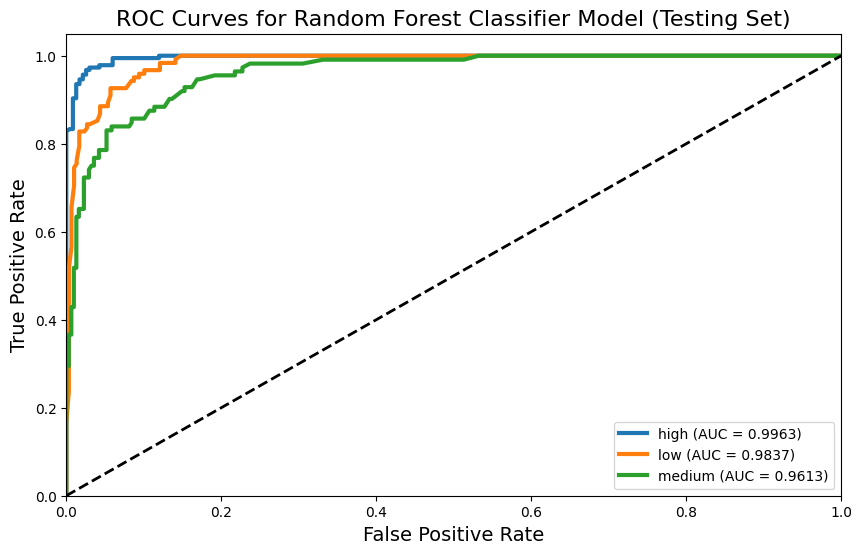

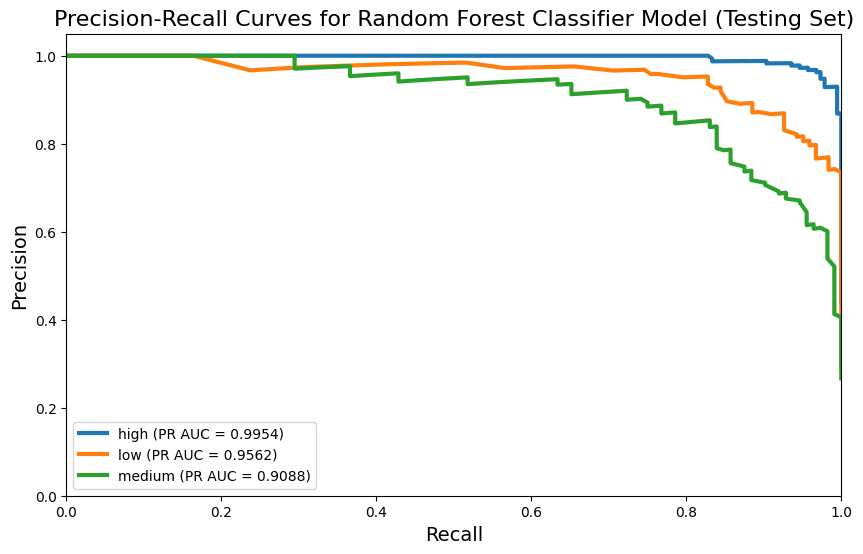

AUC Scores for ROC Curves:
high: AUC (ROC) = 0.9963
low: AUC (ROC) = 0.9837
medium: AUC (ROC) = 0.9613

AUC Scores for Precision-Recall Curves:
high: AUC (PR) = 0.9954
low: AUC (PR) = 0.9562
medium: AUC (PR) = 0.9088
Macro Average ROC AUC = 0.9804
Macro Average PR AUC = 0.9534


In [31]:
# Perform cross-validation with prediction probabilities
predicted_probs_cv = cross_val_predict(rfc, X_test_tr, y_test, cv=3, method="predict_proba")

# Assuming plot_multiclass_curves is defined elsewhere in your code
# This function should return a dictionary with 'auc_scores' and 'pr_auc_scores'
scores = plot_multiclass_curves(y_test, predicted_probs_cv, labels, 'Random Forest Classifier Model (Testing Set)')

# Ensure that 'scores' dictionary is correctly populated
roc_auc_scores = scores.get('roc_auc_scores')
pr_auc_scores = scores.get('pr_auc_scores')

# Calculate the macro average for ROC AUC
if roc_auc_scores is not None:
    macro_avg_roc_auc = np.mean(list(roc_auc_scores.values()))
    print(f'Macro Average ROC AUC = {macro_avg_roc_auc:.4f}')
else:
    print("Error: ROC AUC scores not found.")

# Calculate the macro average for PR AUC
if pr_auc_scores is not None:
    macro_avg_pr_auc = np.mean(list(pr_auc_scores.values()))
    print(f'Macro Average PR AUC = {macro_avg_pr_auc:.4f}')
else:
    print("Error: PR AUC scores not found.")

## Model 3: KNN (K-Nearest Neighbours)

In [32]:
from sklearn.neighbors import KNeighborsClassifier

# Define the model
knn_model = KNeighborsClassifier(n_neighbors=5)  # Initially using n=5

# Train the model on the training set
knn_model.fit(X_train_tr, y_train)

# Predict the labels on the training data
y_pred_train = knn_model.predict(X_train_tr)

# Calculate and print the accuracy on the training set
train_acc = accuracy_score(y_train, y_pred_train)
print(f'Training Accuracy: {train_acc:.4f}')

# Evaluate and print Precision, Recall, and F1 Score (macro average)
precision = precision_score(y_train, y_pred_train, average='macro')
recall = recall_score(y_train, y_pred_train, average='macro')
f1 = f1_score(y_train, y_pred_train, average='macro')
print(f'Precision (Macro Avg): {precision:.4f}')
print(f'Recall (Macro Avg): {recall:.4f}')
print(f'F1 Score (Macro Avg): {f1:.4f}')

# Perform cross-validation and print the results
cv_scores = cross_val_score(knn_model, X_train_tr, y_train, cv=3)
print(f'\nCross-Validation Scores: {cv_scores}')
print(f'Average CV Score: {cv_scores.mean():.4f}')

# Compute and display the confusion matrix
conf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix:")
print(conf_matrix)

Training Accuracy: 0.9095
Precision (Macro Avg): 0.9086
Recall (Macro Avg): 0.8915
F1 Score (Macro Avg): 0.8983

Cross-Validation Scores: [0.84642857 0.8375     0.83214286]
Average CV Score: 0.8387
Confusion Matrix:
[[766   2  13]
 [ 22 358  55]
 [ 42  18 404]]


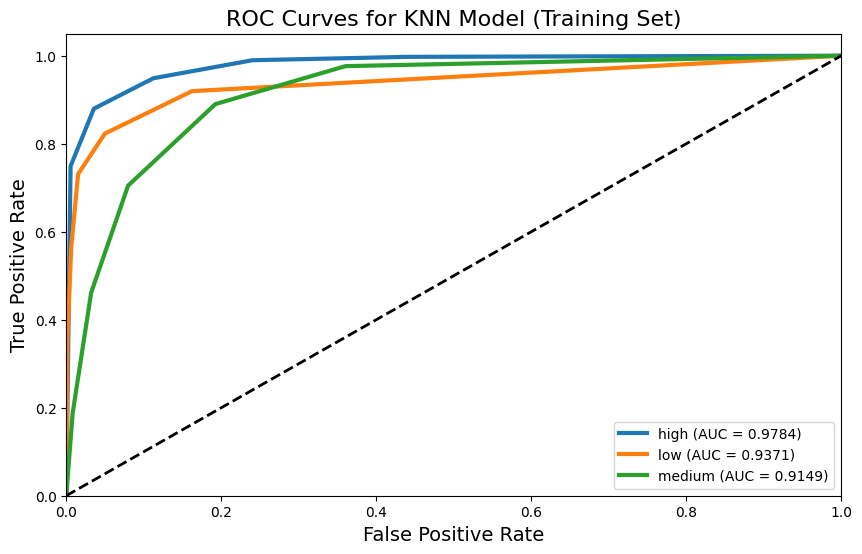

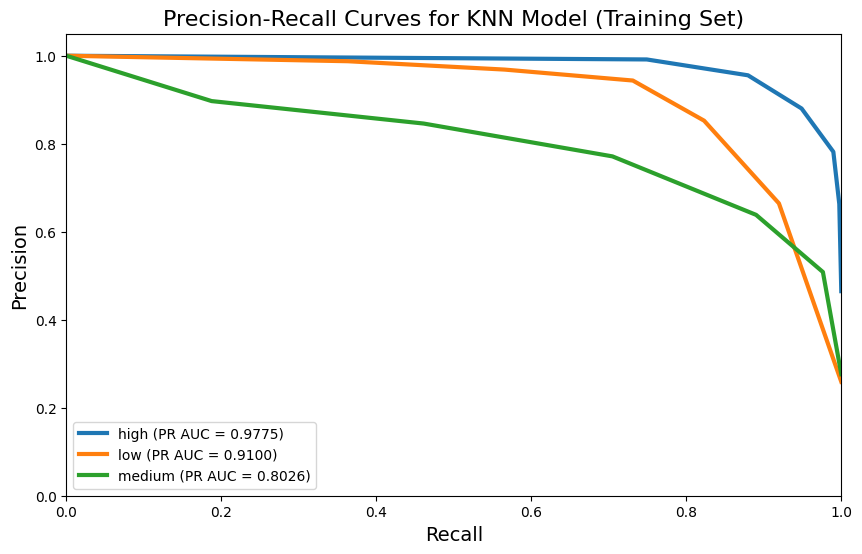

AUC Scores for ROC Curves:
high: AUC (ROC) = 0.9784
low: AUC (ROC) = 0.9371
medium: AUC (ROC) = 0.9149

AUC Scores for Precision-Recall Curves:
high: AUC (PR) = 0.9775
low: AUC (PR) = 0.9100
medium: AUC (PR) = 0.8026
Macro Average ROC AUC = 0.9435
Macro Average PR AUC = 0.8967


In [33]:
# Perform cross-validation with prediction probabilities
predicted_probs_cv = cross_val_predict(knn_model, X_train_tr, y_train, cv=3, method="predict_proba")

# Assuming plot_multiclass_curves is defined elsewhere in your code
# This function should return a dictionary with 'roc_auc_scores' and 'pr_auc_scores'
scores = plot_multiclass_curves(y_train, predicted_probs_cv, labels, 'KNN Model (Training Set)')

# Ensure that 'scores' dictionary is correctly populated
roc_auc_scores = scores.get('roc_auc_scores')
pr_auc_scores = scores.get('pr_auc_scores')

# Calculate the macro average for ROC AUC
if roc_auc_scores is not None:
    macro_avg_roc_auc = np.mean(list(roc_auc_scores.values()))
    print(f'Macro Average ROC AUC = {macro_avg_roc_auc:.4f}')
else:
    print("Error: ROC AUC scores not found.")

# Calculate the macro average for PR AUC
if pr_auc_scores is not None:
    macro_avg_pr_auc = np.mean(list(pr_auc_scores.values()))
    print(f'Macro Average PR AUC = {macro_avg_pr_auc:.4f}')
else:
    print("Error: PR AUC scores not found.")

## Test Set Evaluation

In [34]:
# Generate predictions on the test data
y_test_predictions = knn_model.predict(X_test_tr)

# Evaluate the model's performance on the test set
KNN_acc = accuracy_score(y_test, y_test_predictions)
print(f'\nTest Set Accuracy: {KNN_acc:.4f}')

# Calculate and print Precision, Recall, and F1 Score for the test set (macro average)
test_precision = precision_score(y_test, y_test_predictions, average='macro')
test_recall = recall_score(y_test, y_test_predictions, average='macro')
test_f1 = f1_score(y_test, y_test_predictions, average='macro')
print(f'Precision (Macro Avg): {test_precision:.4f}')
print(f'Recall (Macro Avg): {test_recall:.4f}')
print(f'F1 Score (Macro Avg): {test_f1:.4f}')

# Print the classification report for the test set
print("\nClassification Report (Test Data):")
print(classification_report(y_test, y_test_predictions))

# Compute and display the confusion matrix for the test set
print("\nConfusion Matrix (Test Data):")
confusion_matrix_test = confusion_matrix(y_test, y_test_predictions)
print(confusion_matrix_test)


Test Set Accuracy: 0.8833
Precision (Macro Avg): 0.8809
Recall (Macro Avg): 0.8639
F1 Score (Macro Avg): 0.8677

Classification Report (Test Data):
              precision    recall  f1-score   support

        high       0.92      0.99      0.95       186
         low       0.95      0.75      0.84       122
      medium       0.78      0.85      0.81       112

    accuracy                           0.88       420
   macro avg       0.88      0.86      0.87       420
weighted avg       0.89      0.88      0.88       420


Confusion Matrix (Test Data):
[[184   1   1]
 [  4  92  26]
 [ 13   4  95]]


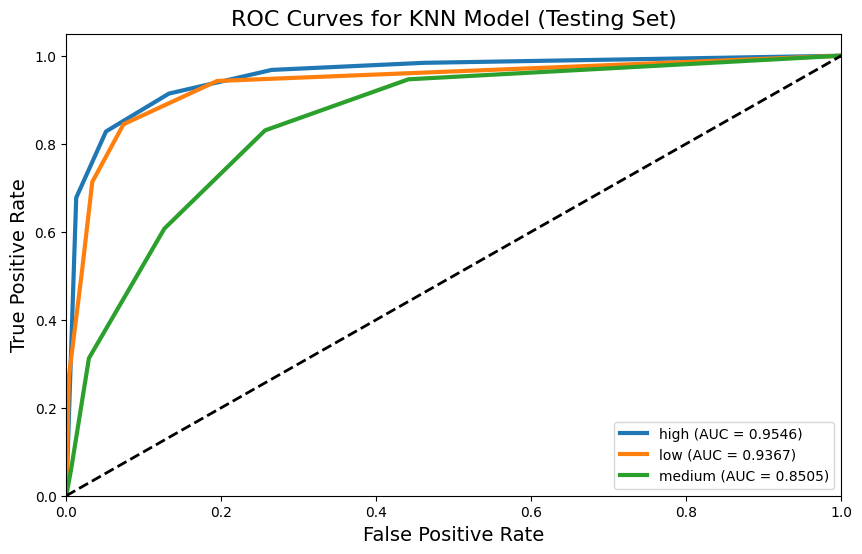

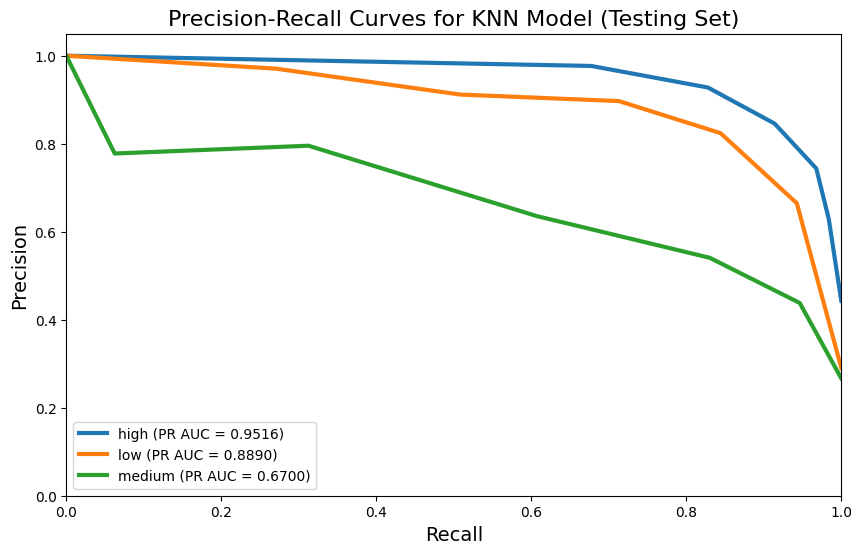

AUC Scores for ROC Curves:
high: AUC (ROC) = 0.9546
low: AUC (ROC) = 0.9367
medium: AUC (ROC) = 0.8505

AUC Scores for Precision-Recall Curves:
high: AUC (PR) = 0.9516
low: AUC (PR) = 0.8890
medium: AUC (PR) = 0.6700
Macro Average ROC AUC = 0.9139
Macro Average PR AUC = 0.8369


In [35]:
# Perform cross-validation with prediction probabilities
predicted_probs_cv = cross_val_predict(knn_model, X_test_tr, y_test, cv=3, method="predict_proba")

# Assuming plot_multiclass_curves is defined elsewhere in your code
# This function should return a dictionary with 'auc_scores' and 'pr_auc_scores'
scores = plot_multiclass_curves(y_test, predicted_probs_cv, labels, 'KNN Model (Testing Set)')

# Ensure that 'scores' dictionary is correctly populated
roc_auc_scores = scores.get('roc_auc_scores')
pr_auc_scores = scores.get('pr_auc_scores')

# Calculate the macro average for ROC AUC
if roc_auc_scores is not None:
    macro_avg_roc_auc = np.mean(list(roc_auc_scores.values()))
    print(f'Macro Average ROC AUC = {macro_avg_roc_auc:.4f}')
else:
    print("Error: ROC AUC scores not found.")

# Calculate the macro average for PR AUC
if pr_auc_scores is not None:
    macro_avg_pr_auc = np.mean(list(pr_auc_scores.values()))
    print(f'Macro Average PR AUC = {macro_avg_pr_auc:.4f}')
else:
    print("Error: PR AUC scores not found.")

## 4.0 Model Tuning and Testing 

### Support Vector Machine (SVM)


In [36]:
# Define the hyperparameter grid for the SVM model 
svm_param_grid = {
    'estimator__C': [ 0.1, 1, 10, 100],        # Regularization parameter values to test
    'estimator__kernel': ['linear', 'rbf'],   # Types of kernels to evaluate
    'estimator__gamma': ['scale', 'auto'] ,   # Gamma values for the RBF kernel

}

# Initialize GridSearchCV for the OneVsRestClassifier with the SVM model
svm_grid_search = GridSearchCV(multi_class_model, svm_param_grid, cv=3, scoring='accuracy')

# Fit the GridSearchCV on the training data
svm_grid_search.fit(X_train_tr, y_train)

# Output the best hyperparameters and the corresponding cross-validation score
print("Optimal Parameters for SVM:", svm_grid_search.best_params_)
print("Highest Cross-Validation Accuracy for SVM:", svm_grid_search.best_score_)



Optimal Parameters for SVM: {'estimator__C': 100, 'estimator__gamma': 'scale', 'estimator__kernel': 'linear'}
Highest Cross-Validation Accuracy for SVM: 0.9779761904761904


In [37]:
# Use the best model from GridSearchCV to generate predictions on the training data
training_predictions = svm_grid_search.predict(X_train_tr)

# Calculate and print the accuracy on the training set
train_set_accuracy = accuracy_score(y_train, training_predictions)
print(f"Accuracy on Training Set: {train_set_accuracy:.4f}")

# Compute and display precision, recall, and F1 score (macro average) for the training set
train_precision_macro = precision_score(y_train, training_predictions, average='macro')
train_recall_macro = recall_score(y_train, training_predictions, average='macro')
train_f1_macro = f1_score(y_train, training_predictions, average='macro')

print(f'Precision (Macro Average on Training Set): {train_precision_macro:.4f}')
print(f'Recall (Macro Average on Training Set): {train_recall_macro:.4f}')
print(f'F1 Score (Macro Average on Training Set): {train_f1_macro:.4f}')

# Generate and print the confusion matrix for the training set
train_conf_matrix = confusion_matrix(y_train, training_predictions)
print("Confusion Matrix for Training Set:\n", train_conf_matrix)



Accuracy on Training Set: 0.9923
Precision (Macro Average on Training Set): 0.9928
Recall (Macro Average on Training Set): 0.9906
F1 Score (Macro Average on Training Set): 0.9917
Confusion Matrix for Training Set:
 [[781   0   0]
 [  0 434   1]
 [  8   4 452]]


## Test Set Evaluation

In [38]:
# Generate predictions on the test data using the best model from GridSearchCV for SVM
test_preds_svm = svm_grid_search.predict(X_test_tr)

# Calculate and print accuracy on the test set
accuracy_test_svm = accuracy_score(y_test, test_preds_svm)
print(f"Accuracy on Test Set: {accuracy_test_svm:.4f}")

# Compute and display precision, recall, and F1 score (macro average) on the test set
precision_macro_test_svm = precision_score(y_test, test_preds_svm, average='macro')
recall_macro_test_svm = recall_score(y_test, test_preds_svm, average='macro')
f1_macro_test_svm = f1_score(y_test, test_preds_svm, average='macro')

print(f'Precision (Macro Average on Test Set): {precision_macro_test_svm:.4f}')
print(f'Recall (Macro Average on Test Set): {recall_macro_test_svm:.4f}')
print(f'F1 Score (Macro Average on Test Set): {f1_macro_test_svm:.4f}')

# Generate and print the confusion matrix for the test set
conf_matrix_test_svm = confusion_matrix(y_test, test_preds_svm)
print("Confusion Matrix (Test Set):\n", conf_matrix_test_svm)



Accuracy on Test Set: 0.9667
Precision (Macro Average on Test Set): 0.9657
Recall (Macro Average on Test Set): 0.9600
F1 Score (Macro Average on Test Set): 0.9623
Confusion Matrix (Test Set):
 [[185   0   1]
 [  0 120   2]
 [  5   6 101]]


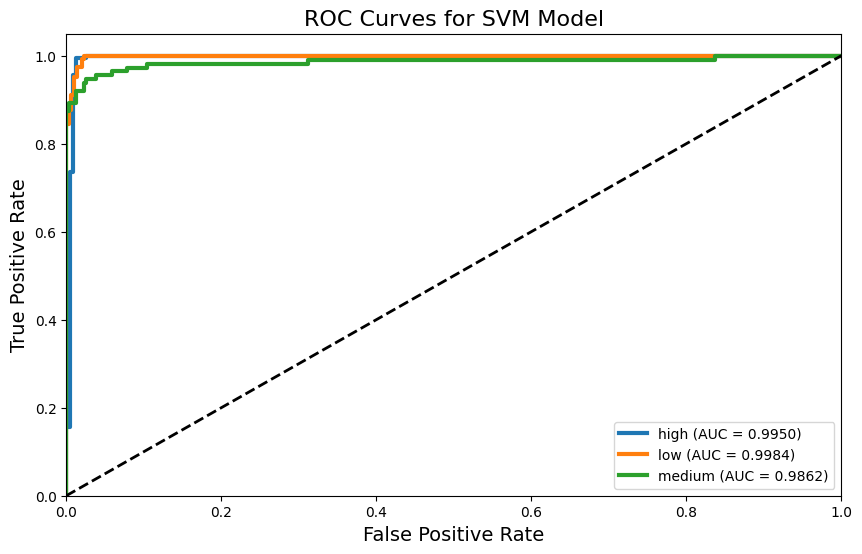

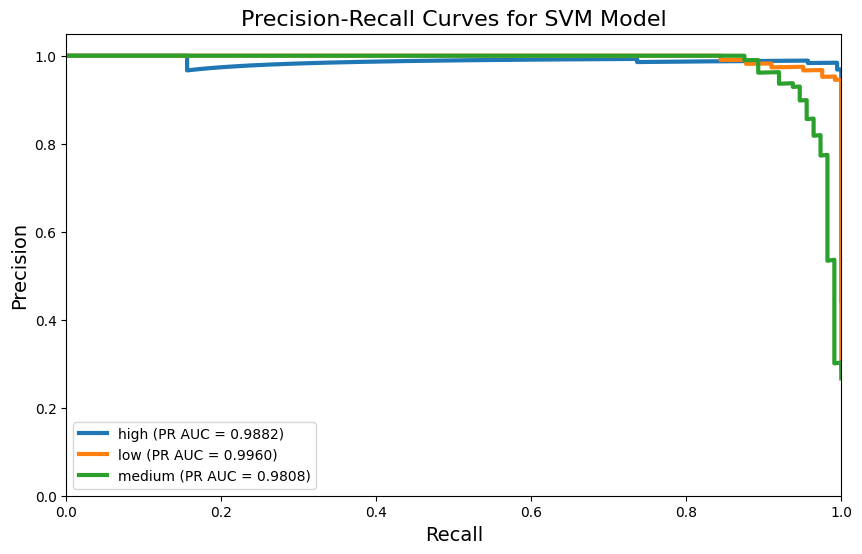

AUC Scores for ROC Curves:
high: AUC (ROC) = 0.9950
low: AUC (ROC) = 0.9984
medium: AUC (ROC) = 0.9862

AUC Scores for Precision-Recall Curves:
high: AUC (PR) = 0.9882
low: AUC (PR) = 0.9960
medium: AUC (PR) = 0.9808
Macro Average ROC AUC = 0.9932
Macro Average PR AUC = 0.9884


In [39]:
# Obtain predicted probabilities for the test data using the optimized SVM Regression model
predicted_probabilities_test = svm_grid_search.predict_proba(X_test_tr)

# Assuming plot_multiclass_curves is defined elsewhere in your code
# This function should return a dictionary with 'roc_auc_scores' and 'pr_auc_scores'
scores = plot_multiclass_curves(y_test, predicted_probabilities_test, labels, 'SVM Model')

# Ensure that 'scores' dictionary is correctly populated
roc_auc_scores = scores.get('roc_auc_scores')
pr_auc_scores = scores.get('pr_auc_scores')

# Calculate the macro average for ROC AUC
if roc_auc_scores is not None:
    macro_avg_roc_auc = np.mean(list(roc_auc_scores.values()))
    print(f'Macro Average ROC AUC = {macro_avg_roc_auc:.4f}')
else:
    print("Error: ROC AUC scores not found.")

# Calculate the macro average for PR AUC
if pr_auc_scores is not None:
    macro_avg_pr_auc = np.mean(list(pr_auc_scores.values()))
    print(f'Macro Average PR AUC = {macro_avg_pr_auc:.4f}')
else:
    print("Error: PR AUC scores not found.")

### Random Forest Classifier

In [40]:
# Define the parameter grid
param_rfc = {
    'n_estimators': [50, 100, 200],               # Number of trees
    'max_depth': [None,10, 20, 30],              # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],              # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],                # Minimum number of samples required at each leaf node

}
# Initialize GridSearchCV with RandomForestClassifier and 3-fold cross-validation
grid_search_rfc = GridSearchCV(RandomForestClassifier(random_state=69), param_rfc, cv=3, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search_rfc.fit(X_train_tr, y_train)

# Display the best hyperparameters and the corresponding best cross-validation score
print("Optimal Hyperparameters for Random Forest:", grid_search_rfc.best_params_)
print("Highest Cross-Validation Accuracy Score for Random Forest:", grid_search_rfc.best_score_)


Optimal Hyperparameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Highest Cross-Validation Accuracy Score for Random Forest: 0.9583333333333334


In [41]:
# Predict the training data using the best estimator from GridSearchCV
predictions_train = grid_search_rfc.predict(X_train_tr)

# Calculate and print the accuracy on the training set
accuracy_train = accuracy_score(y_train, predictions_train)
print(f"Training Set Accuracy: {accuracy_train:.4f}")

# Evaluate and print Precision, Recall, and F1 Score (macro average)
precision_train = precision_score(y_train, predictions_train, average='macro')
recall_train = recall_score(y_train, predictions_train, average='macro')
f1_train = f1_score(y_train, predictions_train, average='macro')
print(f'Precision (Macro Avg): {precision_train:.4f}')
print(f'Recall (Macro Avg): {recall_train:.4f}')
print(f'F1 Score (Macro Avg): {f1_train:.4f}')

# Compute and display the confusion matrix for the training set
print("Confusion Matrix (Training Set):")
confusion_matrix_train = confusion_matrix(y_train, predictions_train)
print(confusion_matrix_train)


Training Set Accuracy: 1.0000
Precision (Macro Avg): 1.0000
Recall (Macro Avg): 1.0000
F1 Score (Macro Avg): 1.0000
Confusion Matrix (Training Set):
[[781   0   0]
 [  0 435   0]
 [  0   0 464]]


## Test Set Evaluation

In [42]:
# Predict the labels on the test data using the best Random Forest Classifier
test_predictions_rfc = grid_search_rfc.predict(X_test_tr)

# Calculate and print the accuracy on the test set
test_accuracy_rfc = accuracy_score(y_test, test_predictions_rfc)
print(f"Test Set Accuracy: {test_accuracy_rfc:.4f}")

# Evaluate and print Precision, Recall, and F1 Score (macro average) for the test set
precision_test_rfc = precision_score(y_test, test_predictions_rfc, average='macro')
recall_test_rfc = recall_score(y_test, test_predictions_rfc, average='macro')
f1_score_test_rfc = f1_score(y_test, test_predictions_rfc, average='macro')
print(f'Precision (Macro Avg): {precision_test_rfc:.4f}')
print(f'Recall (Macro Avg): {recall_test_rfc:.4f}')
print(f'F1 Score (Macro Avg): {f1_score_test_rfc:.4f}')

# Generate and print the confusion matrix for the test set
conf_matrix_test_rfc = confusion_matrix(y_test, test_predictions_rfc)
print("\nConfusion Matrix (Test Set):")
print(conf_matrix_test_rfc)


Test Set Accuracy: 0.9667
Precision (Macro Avg): 0.9619
Recall (Macro Avg): 0.9615
F1 Score (Macro Avg): 0.9616

Confusion Matrix (Test Set):
[[185   1   0]
 [  0 114   8]
 [  2   3 107]]


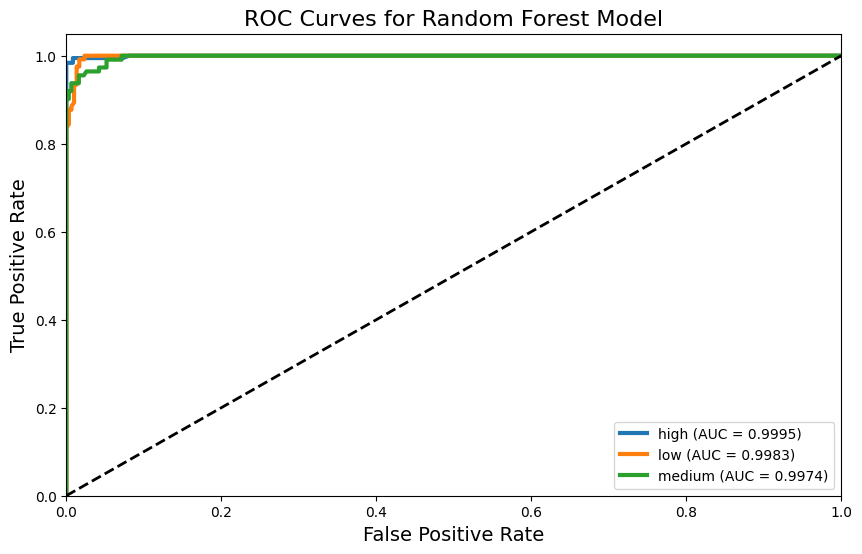

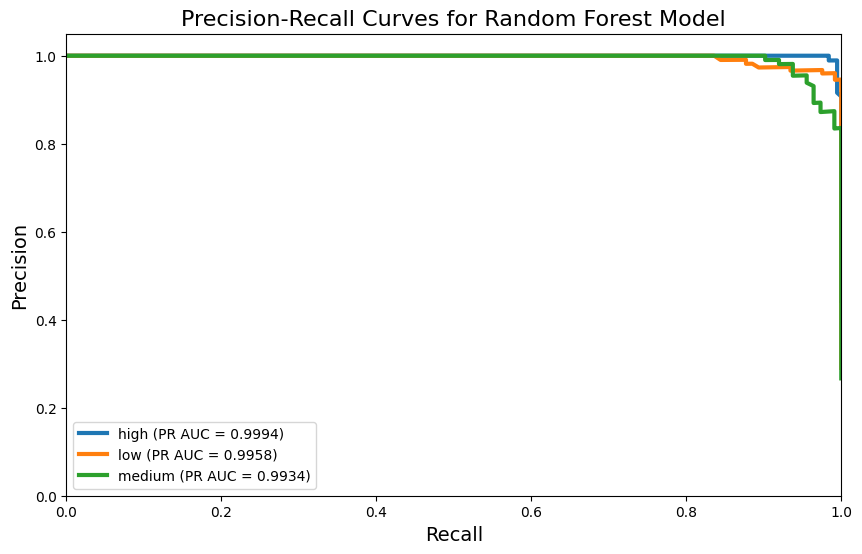

AUC Scores for ROC Curves:
high: AUC (ROC) = 0.9995
low: AUC (ROC) = 0.9983
medium: AUC (ROC) = 0.9974

AUC Scores for Precision-Recall Curves:
high: AUC (PR) = 0.9994
low: AUC (PR) = 0.9958
medium: AUC (PR) = 0.9934
Macro Average ROC AUC = 0.9984
Macro Average PR AUC = 0.9962


In [43]:
# Obtain predicted probabilities for the test data using the optimized Random Forest Classifier
predicted_probabilities_test = grid_search_rfc.predict_proba(X_test_tr)

# Assuming plot_multiclass_curves is defined elsewhere in your code
# This function should return a dictionary with 'roc_auc_scores' and 'pr_auc_scores'
scores = plot_multiclass_curves(y_test, predicted_probabilities_test, labels, 'Random Forest Model')

# Ensure that 'scores' dictionary is correctly populated
roc_auc_scores = scores.get('roc_auc_scores')
pr_auc_scores = scores.get('pr_auc_scores')

# Calculate the macro average for ROC AUC
if roc_auc_scores is not None:
    macro_avg_roc_auc = np.mean(list(roc_auc_scores.values()))
    print(f'Macro Average ROC AUC = {macro_avg_roc_auc:.4f}')
else:
    print("Error: ROC AUC scores not found.")

# Calculate the macro average for PR AUC
if pr_auc_scores is not None:
    macro_avg_pr_auc = np.mean(list(pr_auc_scores.values()))
    print(f'Macro Average PR AUC = {macro_avg_pr_auc:.4f}')
else:
    print("Error: PR AUC scores not found.")


### KNN (K-Nearest Neighbours) Classifier

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define the parameter grid for KNeighborsClassifier
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11,13,15],  # Number of neighbors to use
    'leaf_size': [10, 20, 30, 40, 50],  # Leaf size passed to BallTree or KDTree
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], # Algorithm used to compute the nearest neighbors
   
}

# Initialize GridSearchCV with KNeighborsClassifier and use 3-fold cross-validation
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=3, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search_knn.fit(X_train_tr, y_train)

# Display the best hyperparameters and the corresponding best cross-validation score
print("Optimal Hyperparameters for KNeighborsClassifier:", grid_search_knn.best_params_)
print("Highest Cross-Validation Accuracy Score for KNeighborsClassifier:", grid_search_knn.best_score_)


Optimal Hyperparameters for KNeighborsClassifier: {'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 3}
Highest Cross-Validation Accuracy Score for KNeighborsClassifier: 0.8422619047619048


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [45]:
# Predict the training data using the best estimator from GridSearchCV
predictions_train = grid_search_knn.predict(X_train_tr)

# Calculate and print the accuracy on the training set
accuracy_train = accuracy_score(y_train, predictions_train)
print(f"Training Set Accuracy: {accuracy_train:.4f}")

# Evaluate and print Precision, Recall, and F1 Score (macro average)
precision_train = precision_score(y_train, predictions_train, average='macro')
recall_train = recall_score(y_train, predictions_train, average='macro')
f1_train = f1_score(y_train, predictions_train, average='macro')
print(f'Precision (Macro Avg): {precision_train:.4f}')
print(f'Recall (Macro Avg): {recall_train:.4f}')
print(f'F1 Score (Macro Avg): {f1_train:.4f}')

# Compute and display the confusion matrix for the training set
print("Confusion Matrix (Training Set):")
confusion_matrix_train = confusion_matrix(y_train, predictions_train)
print(confusion_matrix_train)

Training Set Accuracy: 0.9262
Precision (Macro Avg): 0.9261
Recall (Macro Avg): 0.9122
F1 Score (Macro Avg): 0.9174
Confusion Matrix (Training Set):
[[765   2  14]
 [ 22 365  48]
 [ 27  11 426]]


## Test Set Evaluation

In [46]:
# Predict the labels on the test data using the best KNN model
test_predictions_knn = grid_search_knn.predict(X_test_tr)

# Calculate and print the accuracy on the test set
test_accuracy_knn = accuracy_score(y_test, test_predictions_knn)
print(f"Test Set Accuracy: {test_accuracy_knn:.4f}")

# Evaluate and print Precision, Recall, and F1 Score (macro average) for the test set
precision_test_knn = precision_score(y_test, test_predictions_knn, average='macro')
recall_test_knn = recall_score(y_test, test_predictions_knn, average='macro')
f1_score_test_knn = f1_score(y_test, test_predictions_knn, average='macro')
print(f'Precision (Macro Avg): {precision_test_knn:.4f}')
print(f'Recall (Macro Avg): {recall_test_knn:.4f}')
print(f'F1 Score (Macro Avg): {f1_score_test_knn:.4f}')

# Generate and print the confusion matrix for the test set
conf_matrix_test_knn = confusion_matrix(y_test, test_predictions_knn)
print("\nConfusion Matrix (Test Set):")
print(conf_matrix_test_knn)


Test Set Accuracy: 0.8905
Precision (Macro Avg): 0.8874
Recall (Macro Avg): 0.8765
F1 Score (Macro Avg): 0.8785

Confusion Matrix (Test Set):
[[180   1   5]
 [  4  96  22]
 [ 10   4  98]]


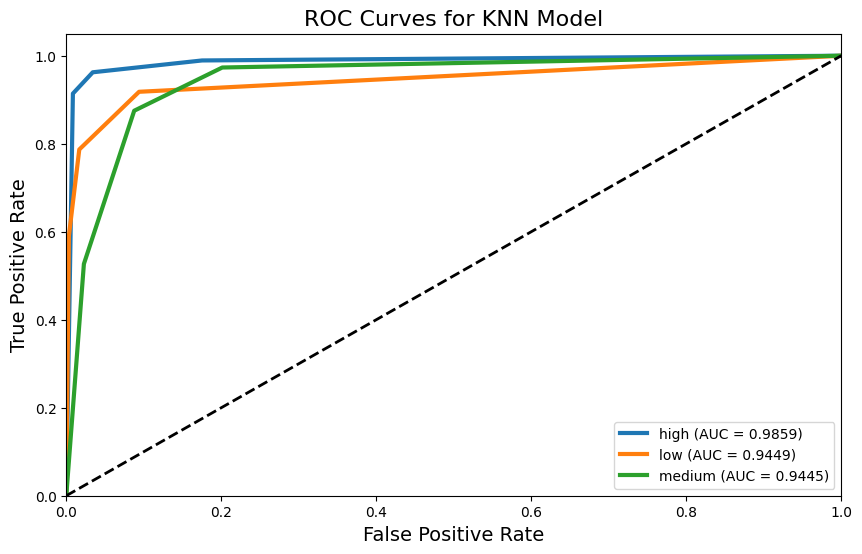

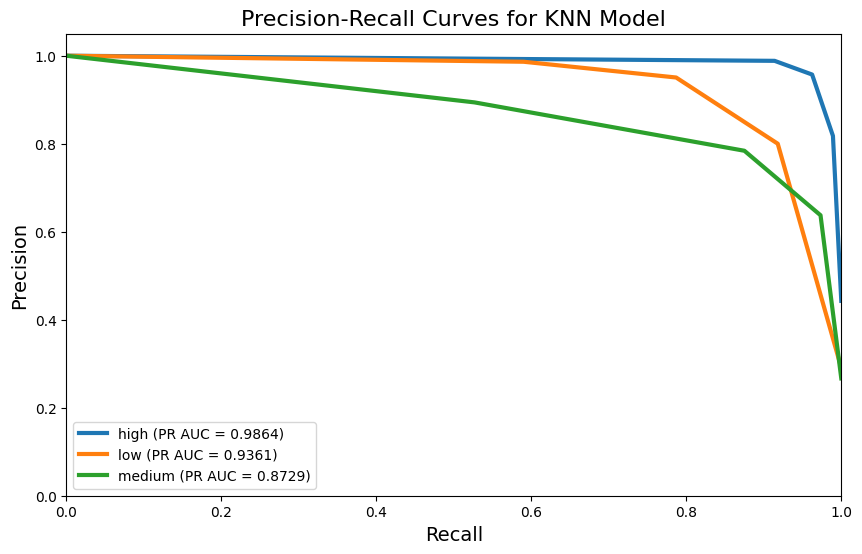

AUC Scores for ROC Curves:
high: AUC (ROC) = 0.9859
low: AUC (ROC) = 0.9449
medium: AUC (ROC) = 0.9445

AUC Scores for Precision-Recall Curves:
high: AUC (PR) = 0.9864
low: AUC (PR) = 0.9361
medium: AUC (PR) = 0.8729
Macro Average ROC AUC = 0.9585
Macro Average PR AUC = 0.9318


In [47]:
# Generate prediction probabilities for the test data using the best model from GridSearchCV
test_pred_probs = grid_search_knn.predict_proba(X_test_tr)

# Assuming plot_multiclass_curves is defined elsewhere in your code
# This function should return a dictionary with 'roc_auc_scores' and 'pr_auc_scores'
scores = plot_multiclass_curves(y_test, test_pred_probs, labels, 'KNN Model')

# Ensure that 'scores' dictionary is correctly populated
roc_auc_scores = scores.get('roc_auc_scores')
pr_auc_scores = scores.get('pr_auc_scores')

# Calculate the macro average for ROC AUC
if roc_auc_scores is not None:
    macro_avg_roc_auc = np.mean(list(roc_auc_scores.values()))
    print(f'Macro Average ROC AUC = {macro_avg_roc_auc:.4f}')
else:
    print("Error: ROC AUC scores not found.")

# Calculate the macro average for PR AUC
if pr_auc_scores is not None:
    macro_avg_pr_auc = np.mean(list(pr_auc_scores.values()))
    print(f'Macro Average PR AUC = {macro_avg_pr_auc:.4f}')
else:
    print("Error: PR AUC scores not found.")

# 5.0 Features Importance of each model

# Features name

In [48]:
# Numerical feature names
numerical_features = X_train_num.columns.tolist()

# Nominal feature names (from one-hot encoding)
nominal_features = onehot_encoder.get_feature_names_out(X_train_cat_nominal.columns)

# Ordinal feature names (directly from the ordinal columns)
ordinal_features = X_train_cat_ordinal.columns.tolist()

# Combine all feature names: numeric, nominal, and ordinal
all_features = numerical_features + list(nominal_features) + ordinal_features


# RandomForest feature

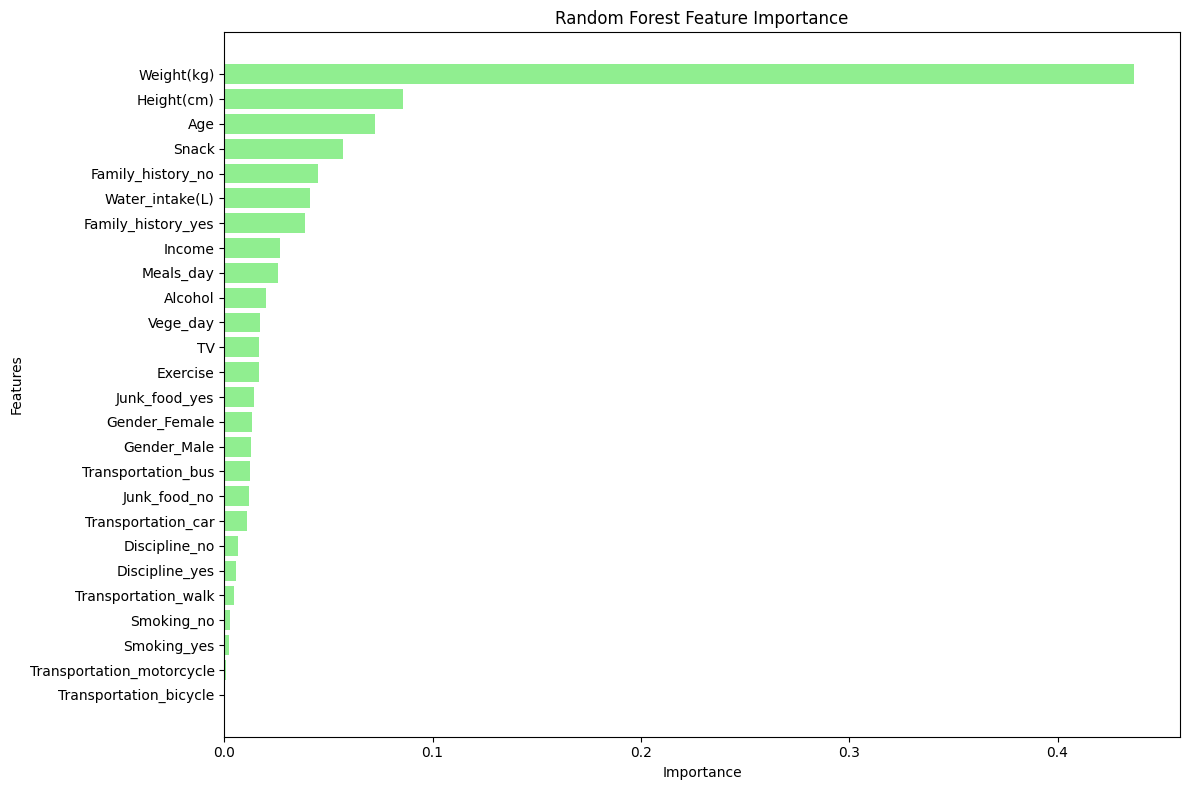

In [49]:
# Retrieve feature importances from the trained Random Forest model
best_rf_model = grid_search_rfc.best_estimator_
feature_importances = best_rf_model.feature_importances_

# Pair feature importances with feature names
features_with_importance = list(zip(all_features, feature_importances))

# Sort the features by importance in descending order
features_with_importance.sort(key=lambda x: x[1], reverse=True)

# Extract the sorted feature names and importances
sorted_feature_names = [item[0] for item in features_with_importance]
sorted_importances = [item[1] for item in features_with_importance]

# Plot the feature importances as a bar chart
plt.figure(figsize=(12, 8))
plt.barh(sorted_feature_names, sorted_importances, color='lightgreen')
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.gca().invert_yaxis()  # Most important features at the top
plt.tight_layout()
plt.show()


# SVM Feature

Top 10 important features for Class: high (SVM - OvR)


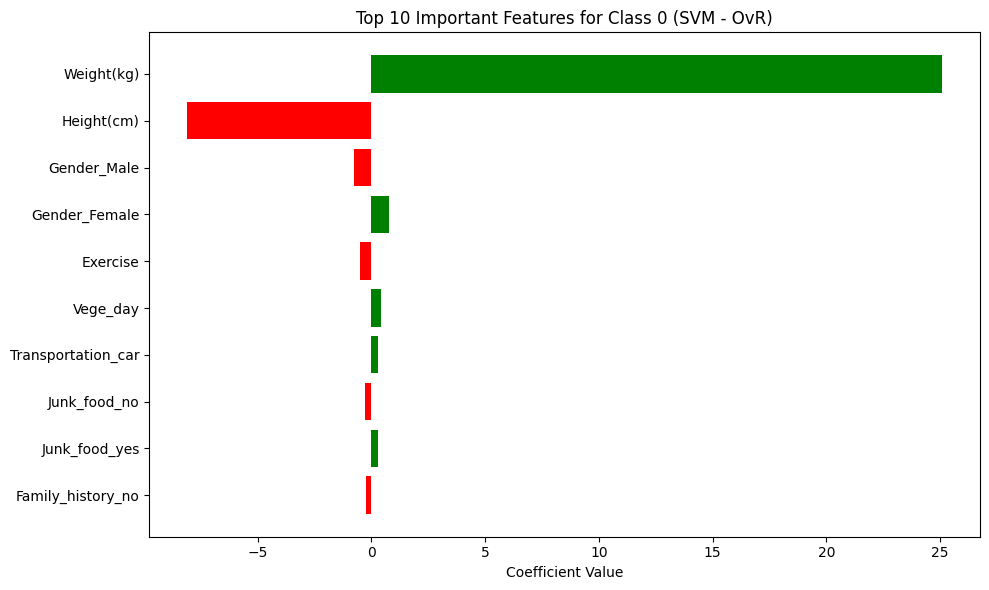

Top 10 important features for Class: low (SVM - OvR)


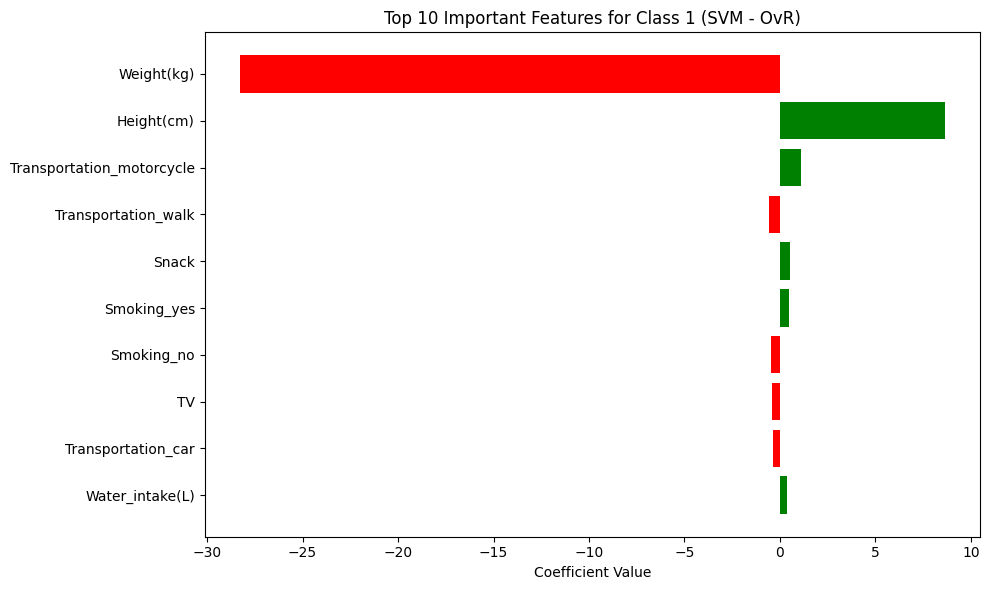

Top 10 important features for Class: medium (SVM - OvR)


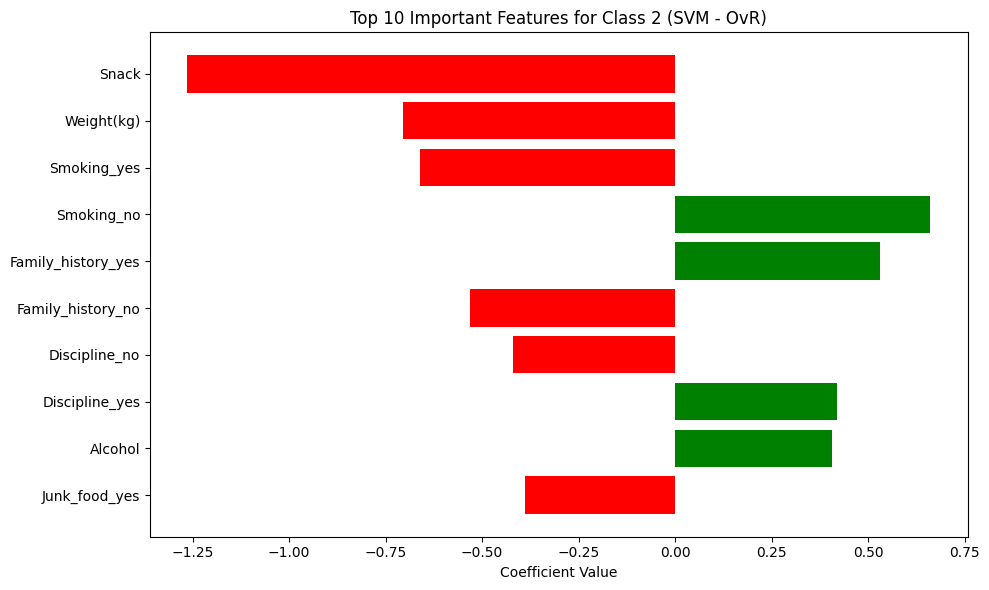

In [50]:
# Assuming the best SVM model is wrapped with OneVsRestClassifier
best_svm = svm_grid_search.best_estimator_

# Get class names from the best SVM model
best_class = best_svm.classes_

# Get the number of classes from the OneVsRestClassifier
no_classes = len(best_class)

def visualize_top_features_for_class(class_index, svm_model, feature_list):
    """
    Visualizes the top 10 most important features for a specific class in a One-vs-Rest SVM model.

    Parameters:
    - class_index: Index of the class to visualize
    - svm_model: The OneVsRestClassifier model containing the individual SVM classifiers
    - feature_list: List of feature names
    """
    # Extract the underlying linear SVM model for the specific class
    current_class_svm = svm_model.estimators_[class_index]

    # Ensure that the model has a linear kernel, which has the 'coef_' attribute
    if hasattr(current_class_svm, 'coef_'):
        # Extract coefficients for the current class
        current_class_coefficients = current_class_svm.coef_.flatten()

        # Create a DataFrame to pair feature names with their respective coefficients
        coef_df = pd.DataFrame({
            'Feature': feature_list,
            'Coefficient': current_class_coefficients
        })

        # Sort by the magnitude of the coefficients (absolute values)
        coef_df['Importance'] = coef_df['Coefficient'].abs()
        sorted_coef_df = coef_df.sort_values(by='Importance', ascending=False)

        # Select the top 10 most important features
        top_features = sorted_coef_df.head(10)

        # Plot the top 10 features and color based on sign (positive/negative)
        plt.figure(figsize=(10, 6))
        bar_colors = ['green' if coef > 0 else 'red' for coef in top_features['Coefficient']]
        plt.barh(top_features['Feature'], top_features['Coefficient'], color=bar_colors)

        # Add labels and title
        plt.xlabel('Coefficient Value')
        plt.title(f"Top 10 Important Features for Class {class_index} (SVM - OvR)")
        plt.gca().invert_yaxis()  # Invert y-axis to show most important features on top
        plt.tight_layout()
        plt.show()
    else:
        print(f"Class {class_index} does not have a 'coef_' attribute. Ensure the SVM uses a linear kernel.")

# Call the function separately for each class to plot feature importance
for idx, class_name in enumerate(best_class):
    print(f"Top 10 important features for Class: {class_name} (SVM - OvR)")
    visualize_top_features_for_class(idx, best_svm, all_features)




# Permutational Feature Importance of KNN

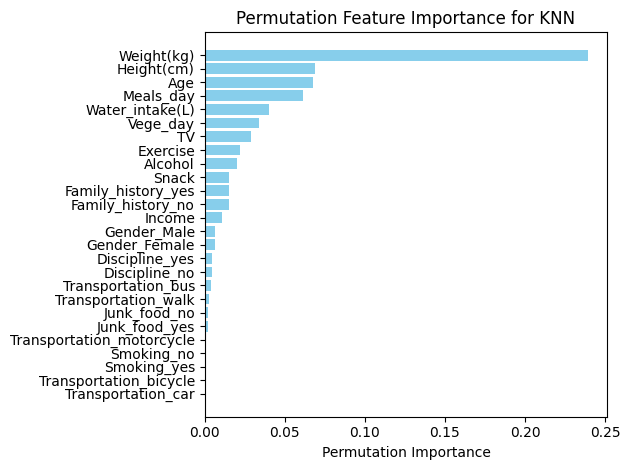

In [51]:
from sklearn.inspection import permutation_importance
# Step 1: Fit the best KNN model to the training data (already done with grid search)
best_knn = grid_search_knn.best_estimator_

# Step 2: Calculate permutation feature importance on the test data
result = permutation_importance(best_knn, X_test_tr, y_test, n_repeats=10, random_state=69)

# Step 3: Plot feature importance
sorted_idx = result.importances_mean.argsort()
plt.barh(np.array(all_features)[sorted_idx], result.importances_mean[sorted_idx], color='skyblue')
plt.xlabel('Permutation Importance')
plt.title('Permutation Feature Importance for KNN')
plt.tight_layout()
plt.show()